In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import sklearn 
from scipy.stats import skew
import scipy
from bioinfokit.analys import stat
import seaborn as sns
import pandas as pd

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import random
random.seed(10)
env=gym.make('Blackjack-v0')
env.reset()

(20, 10, False)

In [5]:
env.action_space.n

2

In [6]:
env.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [7]:
env.action_space

Discrete(2)

In [8]:
env.step(0)

((20, 10, False), 1.0, True, {})

In [9]:
env.reset()
env.step(1)

((19, 10, False), 0.0, False, {})

In [10]:
print(env.reset())
print("GGGGGGGG")
env.step(1)

(16, 2, False)
GGGGGGGG


((20, 2, False), 0.0, False, {})

Player current sum, Dealer one card, whether or not the player holds a usable ace (0 or 1).\\
State,Reward,Is_done\n
0 for exit and 1 for continue\n
1 for win, -1 for loss, 0 for draw\n



    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.

In [11]:
a={}
new_state=[]
b=[]
for i in range(0,10000):
    state_1=env.reset()
    print(state_1)
    print("******************")
    is_done=False
    while is_done==False:
        l=env.action_space.sample()
        state,reward,is_done,info=env.step(l)
        if state_1 not in new_state:
            a={'State':[state_1[0],state_1[1],state_1[2]]}
            a["Action"]=[l]
            a["Reward"]=[reward]
            a["is_done"]=[is_done]
            b.append(a)
            new_state.append(state_1)
        else:
            k=new_state.index(state_1)
            b[k]["Action"].append(l)
            b[k]["Reward"].append(reward)
            b[k]["is_done"].append(is_done)

(14, 5, False)
******************
Old State (14, 5, False) State (23, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 2, True)
******************
Old State (14, 2, True) State (13, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 2, True) State (13, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 5, False)
******************
Old State (19, 5, False) State (19, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 2, False)
******************
Old State (12, 2, False) State (19, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 2, False) State (22, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 6, True)
******************
Old State (18, 6, True) State (18, 6, True) Reward -1.0 Is_done True Info {} Action 0
######
(15, 3, True)
******************
Old State (15, 3, True) State (12, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 3, True) State (22, 3, False) 

Old State (15, 10, False) State (15, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 10, True)
******************
Old State (21, 10, True) State (12, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 8, False)
******************
Old State (20, 8, False) State (26, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 3, False)
******************
Old State (15, 3, False) State (15, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(1

Old State (17, 2, False) State (26, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 3, False)
******************
Old State (15, 3, False) State (15, 3, False) Reward -1.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old State (10, 10, False) State (10, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 6, False)
******************
Old State (19, 6, False) State (22, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 2, False)
******************
Old State (16, 2, False) State (16, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 2, False)
******************
Old State (20, 2, False) State (29, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(19, 5, False)
******************
Old State (19, 5, False) State (19, 5, False) Reward 1.0 Is_done True Info {} Action 0
#####

Old State (13, 9, False) State (18, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 9, False) State (18, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(17, 9, True)
******************
Old State (17, 9, True) State (15, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 9, True) State (15, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 4, False)
******************
Old State (20, 4, False) State (27, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 10, False)
******************
Old State (11, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 10, False) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 10, True)
******************
Old State (19, 10, True) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 10, True) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old Sta

******************
Old State (16, 4, False) State (25, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 9, False)
******************
Old State (16, 9, False) State (25, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(10, 5, False)
******************
Old State (10, 5, False) State (10, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (20, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (20, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 9, False)
******************
Old State (15, 9, False) State (15, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 1, False)
******************
Old State (11, 1, False) State (21, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (

Old State (14, 9, False) State (14, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 8, False)
******************
Old State (12, 8, False) State (14, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 8, False) State (24, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 8, True)
******************
Old State (16, 8, True) State (16, 8, True) Reward 1.0 Is_done True Info {} Action 0
######
(11, 4, False)
******************
Old State (11, 4, False) State (21, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 4, False) State (25, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 10, False)
******************
Old State (18, 10, False) State (18, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(8, 10, False)
******************
Old State (8, 10, False) State (8, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 1

Old State (18, 1, False) State (24, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(6, 5, False)
******************
Old State (6, 5, False) State (6, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 5, False)
******************
Old State (13, 5, False) State (13, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 8, False)
******************
Old State (19, 8, False) State (19, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 9, True)
******************
Old State (18, 9, True) State (16, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 9, True) State (26, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 5, False)
******************
Old State (14, 5, False) State (16, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 5, False) State (16, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(8, 10, False)
******************
Old State (8, 10, False) State (16, 10, Fals

Old State (14, 9, True) State (18, 9, True) Reward -1.0 Is_done True Info {} Action 0
######
(20, 6, True)
******************
Old State (20, 6, True) State (20, 6, True) Reward 0.0 Is_done True Info {} Action 0
######
(12, 8, False)
******************
Old State (12, 8, False) State (18, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 8, False) State (18, 8, False) Reward 0.0 Is_done True Info {} Action 0
######
(17, 5, True)
******************
Old State (17, 5, True) State (17, 5, True) Reward 1.0 Is_done True Info {} Action 0
######
(7, 2, False)
******************
Old State (7, 2, False) State (7, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 2, True)
******************
Old State (19, 2, True) State (19, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 2, True) State (29, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 10, False)
******************
Old State (14, 10, False) State (24, 10, False) Rewa

Old State (10, 5, False) State (23, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(21, 10, True)
******************
Old State (21, 10, True) State (20, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (20, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 10, True)
******************
Old State (21, 10, True) State (21, 10, True) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, True)
******************
Old State (16, 10, True) State (16, 10, True) Reward -1.0 Is_done True Info {} Action 0
######
(12, 7, False)
******************
Old State (12, 7, False) State (18, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 7, False) State (21, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 7, False) State (29, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 8, True)
******************
Old State (18, 8, True) State (17, 8, False) Reward 0.0 Is_done False I

Old State (18, 8, False) State (21, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 8, False) State (21, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 1, True)
******************
Old State (21, 1, True) State (13, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 1, True) State (13, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 2, True)
******************
Old State (15, 2, True) State (12, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 2, True) State (12, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(21, 1, True)
******************
Old State (21, 1, True) State (18, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 1, True) State (18, 1, False) Reward 1.0 Is_done True Info {} Action 0
######
(11, 10, False)
******************
Old State (11, 10, False) State (11, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(7, 10, False)
**

Old State (12, 10, False) State (17, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (27, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 3, False)
******************
Old State (18, 3, False) State (24, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(7, 8, False)
******************
Old State (7, 8, False) State (10, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 8, False) State (14, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 8, False) State (24, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(19, 1, False)
******************
Old State (19, 1, False) State (19, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 5, False)
******************
Old State (13, 5, False) State (13, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 10, False)
******************
Old State (11, 10, False) State (21, 10, False) Reward 0.0 Is_done Fa

Old State (17, 7, False) State (20, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 7, False) State (20, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (18, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (19, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(10, 6, False)
******************
Old State (10, 6, False) State (10, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(4, 10, False)
******************
Old State (4, 10, False) State (4, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 9, False)
******************
Old State (13, 9, False) State (21, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 9, False) State (21, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(17, 

Old State (6, 4, False) State (13, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (6, 4, False) State (13, 4, False) Reward -1.0 Is_done True Info {} Action 0
######
(21, 1, True)
******************
Old State (21, 1, True) State (17, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 1, True) State (17, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 10, False)
******************
Old State (18, 10, False) State (18, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 7, False)
******************
Old State (18, 7, False) State (18, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (28, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 1, False)
******************
Old State (12, 1, False) State (17, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 1, False) State (21, 1, False) Reward 0.0 Is_done Fals

(20, 4, False)
******************
Old State (20, 4, False) State (23, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(9, 9, False)
******************
Old State (9, 9, False) State (20, 9, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 9, False) State (20, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 9, False) State (20, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 10, False)
******************
Old State (20, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (20, 10, False) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 9, False)
******************
Old State (20, 9, False) State (26, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 6, False)
******************
Old State (17, 6, False) State (19, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 6, False) State (19, 6, False) Reward 1.0 Is_done True In

Old State (18, 5, True) State (18, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 5, True) State (18, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 8, False)
******************
Old State (16, 8, False) State (26, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 10, False)
******************
Old State (20, 10, False) State (20, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 3, False)
******************
Old State (20, 3, False) State (20, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(7, 5, False)
******************
Old State (7, 5, False) State (17, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 5, False) State (17, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 10, False)
******************
Old State (14, 10, False) State (14, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 9, True)
******************
Old State (18, 9, True) State (13, 9, F

******************
Old State (12, 7, False) State (12, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 7, False)
******************
Old State (14, 7, False) State (14, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 6, False)
******************
Old State (18, 6, False) State (20, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 6, False) State (23, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 10, False)
******************
Old State (12, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 1, False)
******************
Old State (17, 1, False) State (17, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 8, False)
******************
Old State (18, 8, False) State (18, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 7, False)
******************
Old State (20

Old State (21, 10, True) State (21, 10, True) Reward 0.0 Is_done True Info {} Action 0
######
(12, 6, False)
******************
Old State (12, 6, False) State (12, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 1, True)
******************
Old State (16, 1, True) State (16, 1, True) Reward -1.0 Is_done True Info {} Action 0
######
(15, 1, False)
******************
Old State (15, 1, False) State (15, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(9, 4, False)
******************
Old State (9, 4, False) State (14, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 4, False) State (14, 4, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 8, False)
******************
Old State (11, 8, False) State (12, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 8, False) State (12, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, F

Old State (8, 8, False) State (8, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 2, False)
******************
Old State (16, 2, False) State (18, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 2, False) State (18, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 4, False)
******************
Old State (18, 4, False) State (20, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 4, False) State (27, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(11, 10, False)
******************
Old State (11, 10, False) State (11, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(7, 7, False)
******************
Old State (7, 7, False) State (7, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (17, 

Old State (20, 10, False) State (20, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 7, False)
******************
Old State (19, 7, False) State (25, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 2, False)
******************
Old State (17, 2, False) State (17, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (13, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 10, True)
******************
Old State (21, 10, True) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(8, 10, False)
************

Old State (13, 1, False) State (23, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 4, True)
******************
Old State (14, 4, True) State (20, 4, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 4, True) State (19, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 4, True) State (25, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 2, False)
******************
Old State (20, 2, False) State (20, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (17, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (23, 10, False) Reward -1.0 Is_done

Old State (21, 3, True) State (21, 3, True) Reward 1.0 Is_done True Info {} Action 0
######
(17, 4, False)
******************
Old State (17, 4, False) State (22, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 7, True)
******************
Old State (14, 7, True) State (14, 7, True) Reward -1.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old State (10, 10, False) State (18, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 10, False) State (28, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 3, False)
******************
Old State (14, 3, False) State (14, 3, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 7, True)
*****************

Old State (8, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (8, 10, False) State (29, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 10, False)
******************
Old State (20, 10, False) State (30, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 10, False)
******************
Old State (20, 10, False) State (20, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (22, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 10, False)
******************
Old State (18, 10, False) State (18, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 5, False)
******************
Old State (13, 5, False) State (13, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 4, True)
******************
Old State (21, 4, True) State (12, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 4, True) St

Old State (14, 1, True) State (15, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 1, True) State (15, 1, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(6, 8, False)
******************
Old State (6, 8, False) State (6, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 7, False)
******************
Old State (16, 7, False) State (16, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 6, False)
******************
Old State (13, 6, False) State (13, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(11, 2, False)
******************
Old State (11, 2, False) State (21, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 2, False) State (31, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 2, False)
******************
Old State (11, 2, False) State (20, 2, F

######
Old State (11, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 6, True)
******************
Old State (16, 6, True) State (16, 6, True) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, True)
******************
Old State (19, 10, True) State (19, 10, True) Reward 0.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (21, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(17, 6, False)
******************
Old State (17, 6, False) State (17, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(7, 2, False)
******************
Old State (7, 2, False) State (15, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 2, False) State (21, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 2, False) State (29, 2, False) Reward -1.0 Is_done

Old State (14, 5, False) State (22, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 4, False)
******************
Old State (17, 4, False) State (17, 4, False) Reward 0.0 Is_done True Info {} Action 0
######
(20, 8, True)
******************
Old State (20, 8, True) State (20, 8, True) Reward 1.0 Is_done True Info {} Action 0
######
(13, 8, False)
******************
Old State (13, 8, False) State (14, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 8, False) State (14, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 4, False)
******************
Old State (16, 4, False) State (16, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 8, False)
******************
Old State (13, 8, False) State (13, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 5, False)
******************
Old State (16, 5, False) State (16, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 4, False)
******************
Old State

Old State (8, 7, False) State (19, 7, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (8, 7, False) State (21, 7, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (8, 7, False) State (21, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, True)
******************
Old State (12, 10, True) State (12, 10, True) Reward -1.0 Is_done True Info {} Action 0
######
(20, 7, False)
******************
Old State (20, 7, False) State (20, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 1, False)
******************
Old State (18, 1, False) State (28, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 3, False)
******************
Old State (20, 3, False) State (29, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 10, False)
******************
Old State (14, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 5, False)
******************
Old State (11, 5, False) State (17, 5, F

Old State (8, 9, False) State (27, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 7, False)
******************
Old State (20, 7, False) State (20, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 1, False)
******************
Old State (13, 1, False) State (22, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 10, False)
******************
Old State (15, 10, False) State (23, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(7, 10, False)
******************
Old State (7, 10, False) State (17, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 10, False)
************

Old State (16, 10, False) State (26, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 6, False)
******************
Old State (17, 6, False) State (19, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 6, False) State (19, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(10, 9, False)
******************
Old State (10, 9, False) State (21, 9, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 9, False) State (21, 9, True) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (26, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 5, False)
******************
Old State (17, 5, False) State (23, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 7, False)
******************
Old State (17, 7, False) State (24, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 1, True)
******************
Old State (15, 1, True) State (15, 1

Old State (20, 4, True) State (23, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(8, 3, False)
******************
Old State (8, 3, False) State (11, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (8, 3, False) State (11, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 3, False)
******************
Old State (20, 3, False) State (20, 3, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 6, False)
******************
Old State (13, 6, False) State (13, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 10, True)
******************
Old State (17, 10, True) State (17, 10, True) Reward -1.0 Is_done True Info {} Action 0
######
(15, 1, False)
******************
Old State (15, 1, False) State (25, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 2, False)
******************
Old State (12, 2, False) State (12, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old Sta

Old State (13, 10, False) State (13, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(12, 2, False)
******************
Old State (12, 2, False) State (12, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 5, True)
******************
Old State (16, 5, True) State (20, 5, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 5, True) State (20, 5, True) Reward 1.0 Is_done True Info {} Action 0
######
(8, 8, False)
******************
Old State (8, 8, False) State (8, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 7, True)
******************
Old State (13, 7, True) State (19, 7, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 7, True) State (19, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(18, 5, False)
******************
Old State (18, 5, False) State (18, 5, False) 

Old State (13, 4, True) State (19, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 4, True) State (29, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 8, False)
******************
Old State (20, 8, False) State (23, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 6, False)
******************
Old State (16, 6, False) State (26, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(21, 10, True)
******************
Old State (21, 10, True) State (21, 10, True) Reward 1.0 Is_done True Info {} Action 0
######
(12, 5, False)
******************
Old State (12, 5, False) State (12, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 7, True)
******************
Old State (21, 7, True) State (21, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(10, 1, False)
******************
Old State (10, 1, False) State (10, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 9, False)
******************
Old State 

Old State (6, 7, False) State (6, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 1, False)
******************
Old State (13, 1, False) State (21, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 1, False) State (22, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(5, 10, False)
******************
Old State (5, 10, False) State (10, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (5, 10, False) State (10, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(10, 1, False)
******************
Old State (10, 1, False) State (13, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 1, False) State (13, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 7, True)
******************
Old State (14, 7, True) State (14, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 7, True) State (14, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 2, False

Old State (12, 3, False) State (22, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 10, False)
******************
Old State (13, 10, False) State (22, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 2, False)
******************
Old State (13, 2, False) State (14, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 2, False) State (14, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 7, True)
******************
Old State (15, 7, True) State (19, 7, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 7, True) State (19, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(15, 3, False)
******************
Old State (15, 3, False) State (24, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(19, 8, False)
******************
Old State (19, 8, False) State (19, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(8, 9, False)
******************
Old State (8, 9, False) State (18, 9, Fals

******************
Old State (15, 1, True) State (15, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 1, True) State (19, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 1, True) State (26, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 9, False)
******************
Old State (11, 9, False) State (11, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 8, False)
******************
Old State (16, 8, False) State (26, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 7, False)
******************
Old State (20, 7, False) State (21, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (20, 7, False) State (21, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (13, 10, False) Rewa

Old State (19, 6, False) State (19, 6, False) Reward 0.0 Is_done True Info {} Action 0
######
(20, 4, False)
******************
Old State (20, 4, False) State (20, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(10, 8, False)
******************
Old State (10, 8, False) State (19, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 8, False) State (19, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (13, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(7, 3, False)
******************
Old State (7, 3, False) State (15, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 3, False) State (22, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16,

######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 2, False)
******************
Old State (20, 2, False) State (27, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(10, 5, False)
******************
Old State (10, 5, False) State (10, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(8, 10, False)
******************
Old State (8, 10, False) State (8, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 1, False)
******************
Old State (18, 1, False) State (24, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 9, False)
******************
Old State (20, 9, False) State (26, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 7, False)
******************
Old State (18, 7, False) State (18, 7, False) Rewar

Old State (9, 2, False) State (19, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 2, False) State (27, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 5, False)
******************
Old State (18, 5, False) State (18, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 5, False)
******************
Old State (13, 5, False) State (13, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old State (10, 10, False) State (10, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(12, 2, False)
******************
Old State (12, 2, False) State (12, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 5, False)
******************
Old State (17, 5, False) State (17, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 8, True)
******************
O

Old State (14, 10, True) State (18, 10, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 10, True) State (18, 10, True) Reward -1.0 Is_done True Info {} Action 0
######
(19, 2, False)
******************
Old State (19, 2, False) State (19, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 9, False)
******************
Old State (17, 9, False) State (17, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(8, 10, False)
******************
Old State (8, 10, False) State (8, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 2, False)
******************
Old State (12, 2, False) State (12, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 4, False)
******************
Old State (16, 4, False) State (26, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 4, False)
******************
Old State (15, 4, False) State (15, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 9, False)
******************
Old 

######
Old State (11, 8, False) State (19, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 4, False)
******************
Old State (15, 4, False) State (25, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 7, False)
******************
Old State (20, 7, False) State (20, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 10, False)
******************
Old State (20, 10, False) State (20, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 1, False)
******************
Old State (16, 1, False) State (26, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 6, False)
******************
Old State (13, 6, False) State (13, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 4, False)
******************
Old State (17, 4, False) State (27, 4, False) Reward -1.0 Is_done True Info {} Action 

Old State (16, 1, False) State (26, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 3, False)
******************
Old State (15, 3, False) State (15, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 4, False)
******************
Old State (19, 4, False) State (19, 4, False) Reward 0.0 Is_done True Info {} Action 0
######
(14, 3, True)
******************
Old State (14, 3, True) State (14, 3, True) Reward -1.0 Is_done True Info {} Action 0
######
(13, 9, False)
******************
Old State (13, 9, False) State (23, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(21, 7, True)
******************
Old State (21, 7, True) State (19, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 7, True) State (19, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 8, False)
******************
Old State (15, 8, False) State (15, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(10, 3, False)
******************
Old State (

******************
Old State (15, 1, True) State (15, 1, True) Reward 1.0 Is_done True Info {} Action 0
######
(18, 3, False)
******************
Old State (18, 3, False) State (18, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(9, 10, False)
******************
Old State (9, 10, False) State (14, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 10, False) State (14, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 2, False)
******************
Old State (17, 2, False) State (22, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 10, False)
******************
Old State (18, 10, False) State (28, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 5, True)
******************
Old State (13, 5, True) State (13, 5, True) Reward 1.0 Is_done True Info {} Action 0
######
(12, 7, False)
******************
Old State (12, 7, False) State (12, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 9, False)
******

Old State (18, 3, False) State (20, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 4, False)
******************
Old State (20, 4, False) State (20, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 6, False)
******************
Old State (14, 6, False) State (14, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 5, False)
******************
Old State (16, 5, False) State (16, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 10, False)
******************
Old State (20, 10, False) State (20, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(18, 6, False)
******************
Old State (18, 6, False) State (27, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 1, False)
******************
Old State (20, 1, False) State (20, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(21, 8, True)
******************
Old State (21, 8, True) State (21, 8, True) Reward 1.0 Is_done True Info {} Action 0
######
(17, 6,

######
Old State (14, 10, True) State (14, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(7, 10, False)
******************
Old State (7, 10, False) State (12, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 10, False) State (14, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 10, False) State (14, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 6, True)
******************
Old State (14, 6, True) State (14, 6, True) Reward -1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(8, 7, False)
******************
Old State (8, 7, False) State (8, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 8, False)
******************
Old State (11, 8, False) State (11, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) St

(11, 3, False)
******************
Old State (11, 3, False) State (21, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 3, False) State (21, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 7, False)
******************
Old State (14, 7, False) State (24, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 10, False)
******************
Old State (16, 10, False) State (23, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 7, True)
******************
Old State (14, 7, True) State (14, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 7, True) State (15, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 7, True) State (25, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 7, False)
******************
Old State (20, 7, False) State (30, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(8, 6, False)
******************
Old State (8, 6, False) State (8, 6, Fa

Old State (16, 6, False) State (16, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 3, False)
******************
Old State (18, 3, False) State (28, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 8, True)
******************
Old State (18, 8, True) State (20, 8, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 8, True) State (20, 8, True) Reward 1.0 Is_done True Info {} Action 0
######
(19, 8, False)
******************
Old State (19, 8, False) State (21, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 8, False) State (21, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 3, True)
******************
Old State (21, 3, True) State (21, 3, 

Old State (18, 1, False) State (21, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 1, False) State (21, 1, False) Reward 0.0 Is_done True Info {} Action 0
######
(17, 8, False)
******************
Old State (17, 8, False) State (18, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 8, False) State (28, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 3, False)
******************
Old State (13, 3, False) State (23, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 3, False)
******************
Old State (19, 3, False) State (22, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 10, False)
******************
Old State (14, 10, False) State (14, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 2, False)
******************
Old State (16, 2, False) State (

Old State (10, 10, False) State (23, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(19, 5, False)
******************
Old State (19, 5, False) State (24, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(10, 3, False)
******************
Old State (10, 3, False) State (18, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 3, False) State (28, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(15, 4, True)
******************
Old State (15, 4, True) State (15, 4, True) Reward -1.0 Is_done True Info {} Action 0
######
(18, 2, False)
******************
Old State (18, 2, False) State (18, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 5, False)
******************
Old State (14, 5, False) State (14, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 8, False)
******************
Ol

Old State (5, 10, False) State (5, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 4, False)
******************
Old State (15, 4, False) State (21, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 4, False) State (28, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(10, 1, False)
******************
Old State (10, 1, False) State (10, 1, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (13, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (13, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 6, False)
******************
Old State (18, 6, False) State (21, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 6, False) State (25, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward 0.0 Is_don

Old State (15, 4, False) State (20, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 4, False) State (20, 4, False) Reward 0.0 Is_done True Info {} Action 0
######
(17, 6, False)
******************
Old State (17, 6, False) State (27, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(9, 8, False)
******************
Old State (9, 8, False) State (16, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 8, False) State (24, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 5, False)
******************
Old State (12, 5, False) State (13, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 5, False) State (13, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 6, False)
******************
Old State (20, 6, False) State (20, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 10, False)
******************
Old State (18, 10, False) State (23, 10, False) Reward -1.0 Is_done True I

Old State (12, 10, False) State (23, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 2, True)
******************
Old State (14, 2, True) State (15, 2, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 2, True) State (15, 2, True) Reward -1.0 Is_done True Info {} Action 0
######
(14, 10, True)
******************
Old State (14, 10, True) State (14, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 10, True) State (14, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 7, True)
******************
Old State (21, 7, True) State (16, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 7, True) State (26, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 4, False)
******************
Old State (17, 4, False) State (24, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 2, False)
******************
Old State (16, 2, False) State (25, 2, False) Reward -1.0 Is_done True Info

Old State (21, 10, True) State (20, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old State (10, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (10, 10, False) State (27, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(5, 2, False)
******************
Old State (5, 2, False) State (12, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (5, 2, False) State (12, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 6, False)
******************
Old State (18, 6, False) State (18, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (22, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(21, 2, True)
******************
Old State (21, 2, True) State (17, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 2, True) State (17, 2, False) Reward -1.0 Is_done Tr

Old State (16, 10, True) State (16, 10, True) Reward -1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (22, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 3, False)
******************
Old State (18, 3, False) State (18, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 9, False)
******************
Old State (16, 9, False) State (16, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 2, True)
******************
Old State (13, 2, True) State (12, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 2, True) State (18, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 2, True) State (18, 2, False) Reward 0.0 Is_done True Info {} Action 0
######
(16, 5, True)
******************
Old State (16, 5, True) State (19, 5, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 5, True) State (15, 5, False) Reward 0.0 Is_done False Info {

Old State (18, 10, False) State (28, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 7, False)
******************
Old State (18, 7, False) State (19, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 7, False) State (25, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 10, False)
******************
Old State (11, 10, False) State (17, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 8, False)
******************
Old State (20, 8, False) State (20, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(17, 6, False)
******************
Old State (17, 6, False) State (17, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 8, False)
******************
Old State (14, 8, False) State (14, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 1, False)
******************
Old State (17, 1, False) State

Old State (16, 9, False) State (21, 9, False) Reward 1.0 Is_done True Info {} Action 0
######
(7, 1, False)
******************
Old State (7, 1, False) State (12, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (7, 1, False) State (22, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 10, False)
******************
Old State (12, 10, False) State (18, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (22, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 6, False)
******************
Old State (20, 6, False) State (20, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 6, False)
******************
Old State (14, 6, False) State (19, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 6, False) State (29, 6, False) Reward -1.0 Is_done Tr

Old State (13, 6, False) State (18, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 6, False) State (18, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 4, False)
******************
Old State (13, 4, False) State (13, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 1, False)
******************
Old State (19, 1, False) State (19, 1, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 6, False)
******************
Old State (16, 6, False) State (16, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 8, False)
******************
Old State (20, 8, False) State (20, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 8, True)
******************
Old State (21, 8, True) State (21, 8, True) Reward 1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (13, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old S

Old State (12, 5, False) State (20, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 3, False)
******************
Old State (15, 3, False) State (21, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (15, 3, False) State (21, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(8, 5, False)
******************
Old State (8, 5, False) State (18, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (8, 5, False) State (18, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 5, True)
******************
Old State (16, 5, True) State (16, 5, True) Reward -1.0 Is_done True Info {} Action 0
######
(19, 2, False)
******************
Old State (19, 2, False) State (19, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 10, True)
******************
Old State (21, 10, True) State (21, 10, True) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (17, 10, Fals

Old State (13, 5, False) State (18, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 5, True)
******************
Old State (18, 5, True) State (12, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 5, True) State (12, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 7, False)
******************
Old State (11, 7, False) State (11, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 6, False)
******************
Old State (16, 6, False) State (23, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 8, False)
******************
Old State (16, 8, False) State (25, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 6, False)
******************
Old State (19, 6, False) State (19, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 8, False)
******************
Old 

Old State (18, 10, False) State (20, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 10, False) State (20, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 7, False)
******************
Old State (19, 7, False) State (19, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (18, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (18, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (26, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (27, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(14, 4, False)
******************
Old State (14, 4, False) State (17, 4, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 4, False) State (20, 4, False) Reward 0.0 

Old State (11, 3, False) State (17, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 3, False) State (26, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 6, False)
******************
Old State (12, 6, False) State (17, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 6, False) State (17, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 8, False)
******************
Old State (16, 8, False) State (18, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 8, False) State (18, 8, False) Reward 0.0 Is_done True Info {} Action 0
######
(14, 10, False)
******************
Old State (14, 10, False) State (14, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(15, 10, False)
******************
Old State (15, 10, False) State (15, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(10, 9, False)
******************
Old State (10, 9, False) State (10, 9, False) Reward -1.0 Is_done 

Old State (21, 10, True) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 9, False)
******************
Old State (19, 9, False) State (21, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 9, False) State (31, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 8, False)
******************
Old State (13, 8, False) State (16, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 8, False) State (16, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 1, False)
******************
Old State (16, 1, False) State (26, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(8, 10, False)
******************
Old State (8, 10, False) State (8, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (17, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (17, 10, False) Reward 1.0 Is_done 

Old State (7, 7, False) State (27, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(9, 10, False)
******************
Old State (9, 10, False) State (9, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 7, False)
******************
Old State (14, 7, False) State (14, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 1, False)
******************
Old State (11, 1, False) State (15, 1, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 1, False) State (15, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 2, False)
******************
Old State (14, 2, False) State (14, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 6, False)
******************
Old State (20, 6, False) State (20, 6, False) Reward 0.0 Is_done True Info {} Action 0
######
(11, 6, False)
******************
Old State (11, 6, False) State (15, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (11, 6, False) State (25, 6,

Old State (19, 6, False) State (19, 6, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 3, False)
******************
Old State (19, 3, False) State (29, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 10, False)
******************
Old State (12, 10, False) State (12, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 10, False)
******************
Old State (14, 10, False) State (16, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (14, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 8, True)
******************
Old State (17, 8, True) State (17, 8, True) Reward -1.0 Is_done True Info {} Action 0
######
(20, 1, False)
******************
Old State (20, 1, False) State (20, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(21, 2, True)
******************
Old State (21, 2, True) State (21, 2, True) Reward 1.0 Is_done True Info {} Action 0
######
(6, 1, False)
******************
Ol

Old State (14, 1, False) State (14, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 1, False)
******************
Old State (16, 1, False) State (16, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(17, 2, True)
******************
Old State (17, 2, True) State (21, 2, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 2, True) State (21, 2, True) Reward 1.0 Is_done True Info {} Action 0
######
(18, 5, False)
******************
Old State (18, 5, False) State (20, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 5, False) State (20, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 7, True)
******************
Old State (14, 7, True) State (14, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(17, 10, False)
******************
Old State (17, 10, False) State (17, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(21, 4, True)
******************
Old State (21, 4, True) State (15, 4, False) 

######
(14, 10, False)
******************
Old State (14, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(8, 10, False)
******************
Old State (8, 10, False) State (8, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(12, 2, False)
******************
Old State (12, 2, False) State (22, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 4, False)
******************
Old State (13, 4, False) State (23, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(7, 8, False)
******************
Old State (7, 8, False) State (7, 8, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 7, False)
******************
Old State (18, 7, False) State (18, 7, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 1, True)
******************
Old State (14, 1, True) State (14, 1, True) Reward -1.0 

Old State (20, 10, False) State (30, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(21, 10, True)
******************
Old State (21, 10, True) State (21, 10, True) Reward 1.0 Is_done True Info {} Action 0
######
(14, 2, False)
******************
Old State (14, 2, False) State (14, 2, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 10, False)
******************
Old State (13, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 10, False) State (24, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 10, False) State (19, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(15, 5, False)
******************
Old State (15, 5, False) State (24, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(16, 8, False)
******************
Old State (16, 8, False) S

Old State (16, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, False) State (21, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 4, False)
******************
Old State (18, 4, False) State (22, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 6, False)
******************
Old State (18, 6, False) State (21, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (18, 6, False) State (21, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 6, False)
******************
Old State (18, 6, False) State (26, 6, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 1, False)
******************
Old State (20, 1, False) State (29, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(9, 10, False)
******************
Old State (9, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 10, False) State (19, 10, False) Reward 1.0 Is_done T

Old State (14, 5, False) State (14, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 8, True)
******************
Old State (21, 8, True) State (21, 8, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 8, True) State (31, 8, False) Reward -1.0 Is_done True Info {} Action 1
######
(10, 4, False)
******************
Old State (10, 4, False) State (10, 4, False) Reward 1.0 Is_done True Info {} Action 0
######
(20, 1, True)
******************
Old State (20, 1, True) State (20, 1, True) Reward 1.0 Is_done True Info {} Action 0
######
(15, 1, False)
******************
Old State (15, 1, False) State (25, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 10, False)
******************
Old State (13, 10, False) State (20, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 10, False) State (20, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 10, False)
******************
Old State (20, 10, False) State (25, 10

Old State (9, 9, False) State (21, 9, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (9, 9, False) State (31, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 6, False)
******************
Old State (20, 6, False) State (20, 6, False) Reward 1.0 Is_done True Info {} Action 0
######
(13, 5, False)
******************
Old State (13, 5, False) State (13, 5, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 1, False)
******************
Old State (18, 1, False) State (28, 1, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 10, False)
******************
Old State (17, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (17, 10, False) State (21, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(14, 1, False)
******************
Old State (14, 1, False) State (14, 1, False) Reward -1.0 Is_done True Info {} Action 0
######
(14, 10, False)
******************
Old State (14, 10, False) State (1

Old State (14, 7, True) State (14, 7, True) Reward -1.0 Is_done True Info {} Action 0
######
(6, 7, False)
******************
Old State (6, 7, False) State (16, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (6, 7, False) State (26, 7, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 5, False)
******************
Old State (12, 5, False) State (22, 5, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 10, False)
******************
Old State (11, 10, False) State (11, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(10, 10, False)
******************
Old State (10, 10, False) State (10, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 2, False)
******************
Old State (13, 2, False) State (13, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 6, False)
******************
Old State (19, 6, False) State (20, 6, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 6, False) State (20, 

Old State (19, 7, True) State (19, 7, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (19, 7, True) State (19, 7, False) Reward 1.0 Is_done True Info {} Action 0
######
(14, 4, False)
******************
Old State (14, 4, False) State (24, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(20, 4, False)
******************
Old State (20, 4, False) State (25, 4, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 2, False)
******************
Old State (18, 2, False) State (25, 2, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 5, True)
******************
Old State (13, 5, True) State (13, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 5, True) State (20, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 5, True) State (21, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (13, 5, True) State (21, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(6, 10, False)
***

Old State (6, 10, False) State (26, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(12, 5, False)
******************
Old State (12, 5, False) State (14, 5, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 5, False) State (14, 5, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 7, True)
******************
Old State (19, 7, True) State (19, 7, True) Reward 1.0 Is_done True Info {} Action 0
######
(21, 10, True)
******************
Old State (21, 10, True) State (19, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (21, 10, True) State (19, 10, False) Reward 0.0 Is_done True Info {} Action 0
######
(16, 10, True)
******************
Old State (16, 10, True) State (21, 10, True) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, True) State (13, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 10, True) State (14, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State 

Old State (16, 3, False) State (17, 3, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 3, False) State (27, 3, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 3, False)
******************
Old State (11, 3, False) State (11, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(21, 3, True)
******************
Old State (21, 3, True) State (21, 3, True) Reward 1.0 Is_done True Info {} Action 0
######
(12, 10, False)
******************
Old State (12, 10, False) State (21, 10, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (12, 10, False) State (31, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(17, 9, False)
******************
Old State (17, 9, False) State (27, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(13, 3, False)
******************
Old State (13, 3, False) State (13, 3, False) Reward -1.0 Is_done True Info {} Action 0
######
(13, 6, False)
******************
Old State (13, 6, False) State (13, 

Old State (18, 9, False) State (28, 9, False) Reward -1.0 Is_done True Info {} Action 1
######
(11, 3, False)
******************
Old State (11, 3, False) State (11, 3, False) Reward 1.0 Is_done True Info {} Action 0
######
(16, 9, False)
******************
Old State (16, 9, False) State (16, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(11, 9, False)
******************
Old State (11, 9, False) State (11, 9, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 4, False)
******************
Old State (18, 4, False) State (18, 4, False) Reward -1.0 Is_done True Info {} Action 0
######
(18, 4, False)
******************
Old State (18, 4, False) State (18, 4, False) Reward -1.0 Is_done True Info {} Action 0
######
(19, 9, False)
******************
Old State (19, 9, False) State (19, 9, False) Reward 0.0 Is_done True Info {} Action 0
######
(10, 8, False)
******************
Old State (10, 8, False) State (10, 8, False) Reward -1.0 Is_done True Info {} Action 0
######
(7, 

######
(19, 10, False)
******************
Old State (19, 10, False) State (19, 10, False) Reward 1.0 Is_done True Info {} Action 0
######
(19, 9, False)
******************
Old State (19, 9, False) State (19, 9, False) Reward 0.0 Is_done True Info {} Action 0
######
(16, 10, False)
******************
Old State (16, 10, False) State (16, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(16, 2, True)
******************
Old State (16, 2, True) State (15, 2, False) Reward 0.0 Is_done False Info {} Action 1
######
Old State (16, 2, True) State (15, 2, False) Reward 1.0 Is_done True Info {} Action 0
######
(18, 10, False)
******************
Old State (18, 10, False) State (18, 10, False) Reward -1.0 Is_done True Info {} Action 0
######
(20, 10, False)
******************
Old State (20, 10, False) State (27, 10, False) Reward -1.0 Is_done True Info {} Action 1
######
(18, 10, False)
******************
Old State (18, 10, False) State (19, 10, False) Reward 0.0 Is_done False Info {} Ac

In [12]:
b1=b

# Custom Function

In [13]:
def select_action(state_1=state_1,act=[0,1],data=b1,epsilion=0.001,new_state=new_state):
    x=np.random.choice(
        ['random','algorithm'], 
        p=[epsilion,1-epsilion]
    )
    if x=='random':
        l=env.action_space.sample()
    else:
        if state_1 not in new_state:
            x="Not_found"
            l=env.action_space.sample()
        else:
            k=new_state.index(state_1)
            c={"0":0,"1":0}
            d=data[k]
            aa=1
            bb=1
            for i in range(0,len(d["Action"])):
                if d["Action"][i]==1:
                    c["1"]+=d["Reward"][i]
                    aa+=1
                else:
                    c["0"]+=d["Reward"][i]
                    bb+=1
            
            if (c["1"]/aa)>=(c["0"]/bb):
                l=1
            else:
                l=0
    
    state,reward,is_done,info=env.step(l)
    if state_1 not in new_state:
            a={'State':[state_1[0],state_1[1],state_1[2]]}
            a["Action"]=[l]
            a["Reward"]=[reward]
            a["is_done"]=[is_done]
            data.append(a)
            new_state.append(state_1)
    else:
        k=new_state.index(state_1)
        data[k]["Action"].append(l)
        data[k]["Reward"].append(reward)
        data[k]["is_done"].append(is_done)
    return new_state,data,reward,is_done
new_state,b,reward,is_done=select_action()

In [14]:
w1=[]
l1=[]
d1=[]
w1.append(0)
d1.append(0)
l1.append(0)
for i in range(0,10000):
    state_1=env.reset()   
    is_done=False
    while is_done==False:
        new_state,b1,reward,is_done=select_action(epsilion=0.1)
    if reward==1:
        w1[len(w1)-1]+=1
    elif reward==0:
        d1[len(d1)-1]+=1
    else:
        l1[len(l1)-1]+=1
    if i%100==0 and i!=0:
        w1.append(0)
        d1.append(0)
        l1.append(0)
print(w1,l1,d1)

[33, 42, 32, 39, 31, 37, 33, 49, 37, 35, 42, 41, 35, 28, 35, 38, 31, 46, 41, 40, 40, 31, 39, 37, 45, 41, 36, 36, 42, 45, 33, 38, 29, 36, 46, 37, 36, 36, 40, 37, 34, 44, 30, 33, 38, 45, 34, 36, 46, 45, 36, 43, 36, 38, 35, 43, 37, 45, 24, 37, 37, 32, 32, 34, 35, 43, 39, 45, 34, 53, 36, 31, 34, 44, 42, 43, 39, 37, 44, 43, 45, 40, 38, 41, 43, 33, 42, 35, 38, 40, 43, 46, 44, 34, 31, 34, 45, 39, 44, 37] [61, 53, 61, 56, 60, 58, 62, 49, 54, 59, 48, 52, 60, 70, 59, 55, 64, 48, 53, 55, 53, 64, 54, 58, 54, 49, 59, 60, 53, 53, 58, 58, 64, 58, 47, 59, 62, 56, 57, 61, 61, 53, 66, 61, 56, 50, 59, 60, 52, 48, 57, 53, 58, 55, 58, 54, 57, 48, 66, 57, 62, 59, 63, 61, 59, 52, 57, 50, 62, 40, 58, 65, 59, 48, 54, 54, 56, 55, 55, 55, 49, 51, 53, 55, 55, 63, 56, 60, 59, 52, 50, 49, 48, 57, 66, 61, 50, 53, 48, 60] [7, 5, 7, 5, 9, 5, 5, 2, 9, 6, 10, 7, 5, 2, 6, 7, 5, 6, 6, 5, 7, 5, 7, 5, 1, 10, 5, 4, 5, 2, 9, 4, 7, 6, 7, 4, 2, 8, 3, 2, 5, 3, 4, 6, 6, 5, 7, 4, 2, 7, 7, 4, 6, 7, 7, 3, 6, 7, 10, 6, 1, 9, 5, 5, 6,

In [15]:
print( '\n Skewness for data : ', skew(w1))
print( '\n Skewness for data : ', skew(l1))
print( '\n Skewness for data : ', skew(d1))


 Skewness for data :  0.050499051309688806

 Skewness for data :  -0.14020257257599772

 Skewness for data :  -0.02297906160380996


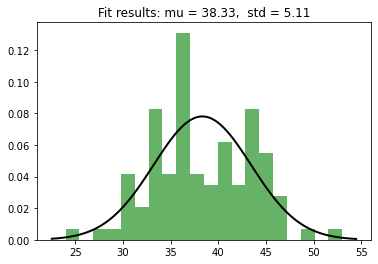

In [16]:
mu, std = norm.fit(w1)
plt.hist(w1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

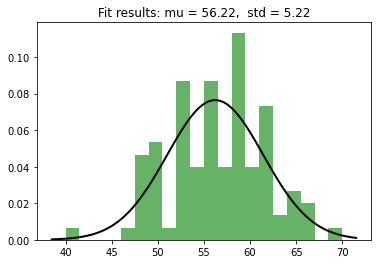

In [17]:
mu, std = norm.fit(l1)
plt.hist(l1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

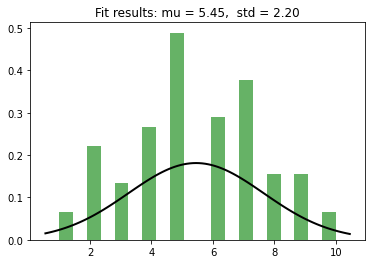

In [18]:
mu, std = norm.fit(d1)
plt.hist(d1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [19]:
w21=[]
l21=[]
d21=[]
w21.append(0)
d21.append(0)
l21.append(0)
b1=b
for i in range(0,10000):
    state_1=env.reset()   
    is_done=False
    while is_done==False:
        new_state,b1,reward,is_done=select_action()
    if reward==1:
        w21[len(w21)-1]+=1
    elif reward==0:
        d21[len(d21)-1]+=1
    else:
        l21[len(l21)-1]+=1
    if i%100==0 and i!=0:
        w21.append(0)
        d21.append(0)
        l21.append(0)
print(w21,l21,d21)

[41, 38, 41, 43, 42, 45, 50, 36, 47, 36, 43, 37, 37, 32, 31, 37, 36, 46, 36, 42, 47, 37, 45, 37, 40, 48, 47, 35, 33, 35, 39, 41, 34, 35, 38, 48, 38, 46, 36, 37, 36, 33, 32, 34, 37, 25, 34, 29, 37, 35, 42, 33, 38, 39, 40, 38, 42, 39, 43, 36, 35, 36, 44, 33, 29, 31, 47, 44, 36, 47, 35, 36, 29, 49, 25, 36, 34, 32, 37, 37, 36, 41, 37, 37, 35, 27, 42, 40, 34, 45, 33, 30, 39, 29, 37, 30, 33, 46, 38, 37] [52, 54, 55, 52, 56, 51, 46, 56, 51, 60, 54, 57, 57, 60, 65, 59, 61, 53, 57, 52, 46, 57, 48, 59, 59, 51, 47, 60, 64, 60, 59, 51, 59, 59, 59, 47, 56, 49, 61, 58, 58, 57, 61, 57, 57, 66, 60, 64, 57, 57, 53, 64, 56, 56, 54, 57, 53, 50, 51, 61, 59, 64, 48, 60, 64, 63, 48, 54, 59, 50, 58, 56, 67, 46, 68, 59, 61, 62, 59, 54, 58, 50, 60, 58, 57, 66, 51, 58, 59, 52, 61, 62, 54, 68, 61, 67, 65, 49, 55, 54] [8, 8, 4, 5, 2, 4, 4, 8, 2, 4, 3, 6, 6, 8, 4, 4, 3, 1, 7, 6, 7, 6, 7, 4, 1, 1, 6, 5, 3, 5, 2, 8, 7, 6, 3, 5, 6, 5, 3, 5, 6, 10, 7, 9, 6, 9, 6, 7, 6, 8, 5, 3, 6, 5, 6, 5, 5, 11, 6, 3, 6, 0, 8, 7, 7, 

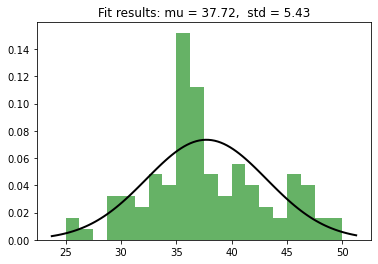

In [20]:
mu, std = norm.fit(w21)
plt.hist(w21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

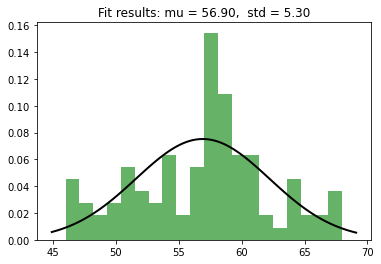

In [21]:
mu, std = norm.fit(l21)
plt.hist(l21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

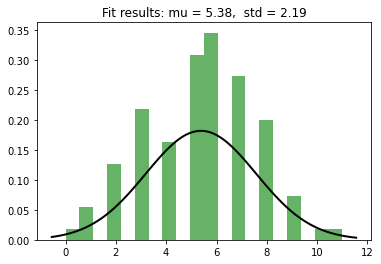

In [22]:
mu, std = norm.fit(d21)
plt.hist(d21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


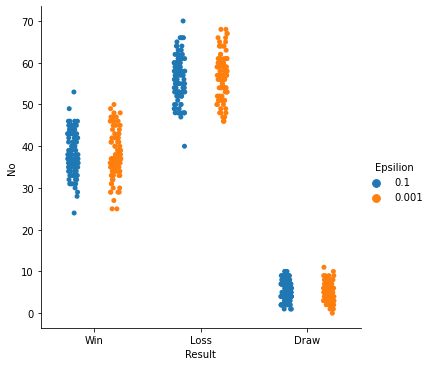

In [23]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w1:
    df=df.append({"No":int(i),"Result":"Win","Epsilion":"0.1"},ignore_index=True)
for i in l1:
    df=df.append({"No":int(i),"Result":"Loss","Epsilion":"0.1"},ignore_index=True)
for i in d1:
    df=df.append({"No":int(i),"Result":"Draw","Epsilion":"0.1"},ignore_index=True)
for i in w21:
    df=df.append({"No":int(i),"Result":"Win","Epsilion":"0.001"},ignore_index=True)
for i in l21:
    df=df.append({"No":int(i),"Result":"Loss","Epsilion":"0.001"},ignore_index=True)
for i in d21:
    df=df.append({"No":int(i),"Result":"Draw","Epsilion":"0.001"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Epsilion",split=True,data=df)

# 18

In [24]:
w2=[]
l2=[]
d2=[]
w2.append(0)
d2.append(0)
l2.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[1]<18:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w2[len(w2)-1]+=1
    elif reward==0:
        d2[len(d2)-1]+=1
    else:
        l2[len(l2)-1]+=1
    if i%100==0 and i!=0:
        w2.append(0)
        d2.append(0)
        l2.append(0)
print(w2,l2,d2)

[39, 44, 35, 33, 33, 43, 38, 37, 39, 44, 44, 38, 45, 37, 36, 45, 36, 36, 40, 34, 42, 46, 44, 41, 39, 35, 35, 35, 32, 40, 38, 40, 35, 39, 31, 40, 39, 47, 27, 42, 38, 38, 38, 40, 47, 42, 47, 34, 38, 35, 36, 36, 46, 38, 42, 39, 31, 38, 36, 41, 34, 39, 38, 34, 41, 40, 35, 34, 38, 38, 35, 37, 38, 45, 33, 32, 49, 38, 40, 33, 35, 43, 28, 30, 46, 33, 40, 39, 35, 47, 35, 32, 41, 33, 36, 39, 38, 38, 42, 38] [58, 52, 56, 61, 64, 53, 57, 57, 55, 53, 53, 59, 50, 57, 59, 52, 57, 62, 56, 61, 55, 51, 49, 56, 55, 59, 57, 57, 65, 56, 57, 54, 60, 60, 60, 56, 57, 49, 70, 55, 51, 56, 60, 56, 47, 53, 50, 62, 60, 61, 58, 60, 50, 56, 52, 54, 61, 59, 59, 53, 61, 58, 58, 58, 56, 56, 58, 61, 55, 55, 61, 59, 60, 51, 58, 62, 47, 54, 56, 64, 60, 52, 66, 66, 52, 61, 54, 54, 61, 49, 60, 63, 54, 58, 59, 56, 56, 61, 54, 54] [4, 4, 9, 6, 3, 4, 5, 6, 6, 3, 3, 3, 5, 6, 5, 3, 7, 2, 4, 5, 3, 3, 7, 3, 6, 6, 8, 8, 3, 4, 5, 6, 5, 1, 9, 4, 4, 4, 3, 3, 11, 6, 2, 4, 6, 5, 3, 4, 2, 4, 6, 4, 4, 6, 6, 7, 8, 3, 5, 6, 5, 3, 4, 8, 3, 4

In [25]:
print( '\n Skewness for data : ', skew(w2))
print( '\n Skewness for data : ', skew(l2))
print( '\n Skewness for data : ', skew(d2))


 Skewness for data :  0.17184592740551008

 Skewness for data :  0.09237213046384597

 Skewness for data :  0.5288917191807968


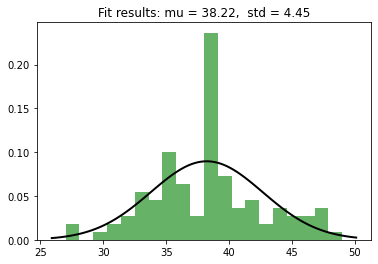

In [26]:
mu, std = norm.fit(w2)
plt.hist(w2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

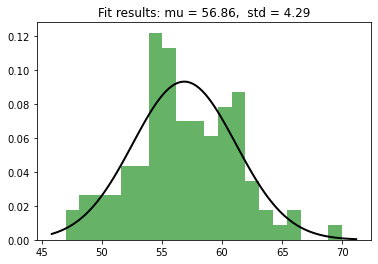

In [27]:
mu, std = norm.fit(l2)
plt.hist(l2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

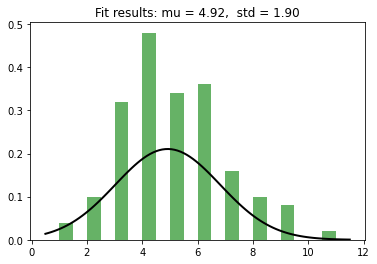

In [28]:
mu, std = norm.fit(d2)
plt.hist(d2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# 16

In [29]:
w3=[]
l3=[]
d3=[]
w3.append(0)
d3.append(0)
l3.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[1]<16:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w3[len(w3)-1]+=1
    elif reward==0:
        d3[len(d3)-1]+=1
    else:
        l3[len(l3)-1]+=1
    if i%100==0 and i!=0:
        w3.append(0)
        d3.append(0)
        l3.append(0)
print(w3,l3,d3)

[33, 42, 31, 37, 35, 42, 39, 39, 34, 44, 43, 33, 44, 33, 39, 39, 41, 45, 38, 39, 39, 35, 30, 43, 38, 37, 43, 47, 38, 41, 38, 36, 40, 43, 40, 32, 50, 34, 40, 34, 23, 39, 38, 44, 31, 36, 36, 41, 34, 33, 37, 36, 34, 31, 33, 35, 44, 36, 35, 33, 33, 36, 28, 41, 42, 41, 39, 38, 38, 39, 43, 37, 41, 34, 41, 46, 40, 28, 41, 45, 34, 38, 33, 28, 45, 34, 29, 38, 31, 35, 31, 39, 26, 42, 45, 44, 31, 41, 35, 39] [67, 54, 66, 58, 61, 55, 58, 55, 62, 52, 53, 64, 52, 61, 56, 58, 54, 51, 60, 58, 54, 59, 67, 50, 56, 61, 53, 48, 53, 56, 58, 59, 55, 49, 58, 63, 46, 59, 57, 62, 72, 53, 57, 54, 62, 59, 58, 54, 63, 63, 60, 61, 61, 65, 60, 61, 51, 56, 58, 63, 59, 58, 64, 54, 52, 55, 53, 61, 57, 56, 52, 59, 52, 62, 53, 46, 54, 67, 48, 49, 60, 57, 61, 61, 47, 56, 61, 56, 63, 60, 65, 56, 68, 55, 51, 52, 57, 54, 63, 57] [1, 4, 3, 5, 4, 3, 3, 6, 4, 4, 4, 3, 4, 6, 5, 3, 5, 4, 2, 3, 7, 6, 3, 7, 6, 2, 4, 5, 9, 3, 4, 5, 5, 8, 2, 5, 4, 7, 3, 4, 5, 8, 5, 2, 7, 5, 6, 5, 3, 4, 3, 3, 5, 4, 7, 4, 5, 8, 7, 4, 8, 6, 8, 5, 6, 4,

In [30]:
print( '\n Skewness for data : ', skew(w3))
print( '\n Skewness for data : ', skew(l3))
print( '\n Skewness for data : ', skew(d3))


 Skewness for data :  -0.21865001046335822

 Skewness for data :  0.08043511757163475

 Skewness for data :  0.8155520486366666


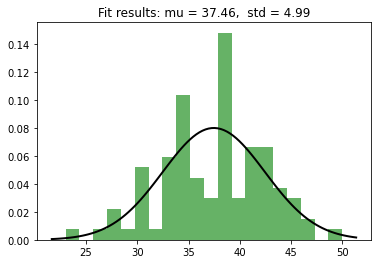

In [31]:
mu, std = norm.fit(w3)
plt.hist(w3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

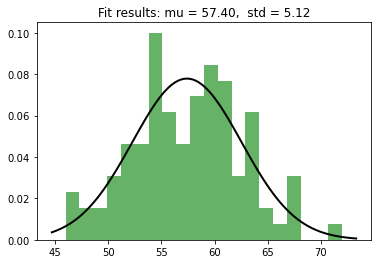

In [32]:
mu, std = norm.fit(l3)
plt.hist(l3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

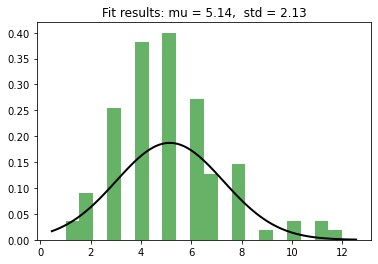

In [33]:
mu, std = norm.fit(d3)
plt.hist(d3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## 19

In [34]:
w4=[]
l4=[]
d4=[]
w4.append(0)
d4.append(0)
l4.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[1]<19:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w4[len(w4)-1]+=1
    elif reward==0:
        d4[len(d4)-1]+=1
    else:
        l4[len(l4)-1]+=1
    if i%100==0 and i!=0:
        w4.append(0)
        d4.append(0)
        l4.append(0)
print(w4,l4,d4)

[40, 32, 37, 46, 36, 38, 39, 37, 35, 37, 36, 39, 34, 35, 32, 27, 35, 41, 45, 34, 32, 38, 37, 45, 48, 38, 40, 31, 31, 35, 39, 31, 40, 42, 40, 34, 38, 36, 40, 43, 38, 39, 37, 37, 35, 32, 39, 27, 34, 40, 39, 37, 38, 36, 27, 32, 42, 33, 38, 44, 41, 40, 36, 38, 36, 40, 38, 35, 40, 34, 39, 27, 40, 39, 25, 34, 41, 35, 35, 35, 38, 42, 34, 37, 42, 38, 33, 45, 32, 31, 32, 40, 33, 39, 38, 35, 45, 40, 33, 36] [50, 63, 62, 50, 56, 57, 60, 58, 59, 60, 62, 55, 64, 59, 63, 72, 58, 53, 53, 58, 61, 54, 57, 51, 47, 55, 58, 61, 57, 61, 56, 68, 55, 51, 55, 62, 54, 59, 54, 56, 53, 55, 56, 58, 61, 62, 61, 68, 60, 57, 57, 59, 55, 53, 67, 58, 55, 61, 58, 53, 58, 56, 59, 60, 54, 54, 58, 60, 56, 62, 51, 66, 55, 56, 74, 57, 55, 60, 60, 63, 58, 55, 64, 57, 55, 57, 61, 53, 62, 62, 63, 54, 61, 54, 57, 57, 54, 58, 62, 60] [11, 5, 1, 4, 8, 5, 1, 5, 6, 3, 2, 6, 2, 6, 5, 1, 7, 6, 2, 8, 7, 8, 6, 4, 5, 7, 2, 8, 12, 4, 5, 1, 5, 7, 5, 4, 8, 5, 6, 1, 9, 6, 7, 5, 4, 6, 0, 5, 6, 3, 4, 4, 7, 11, 6, 10, 3, 6, 4, 3, 1, 4, 5, 2, 1

In [35]:
print( '\n Skewness for data : ', skew(w4))
print( '\n Skewness for data : ', skew(l4))
print( '\n Skewness for data : ', skew(d4))


 Skewness for data :  -0.19026429021550573

 Skewness for data :  0.6910956154650718

 Skewness for data :  0.34703893281211606


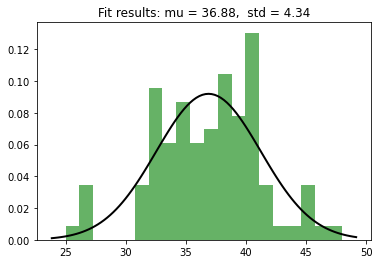

In [36]:
mu, std = norm.fit(w4)
plt.hist(w4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

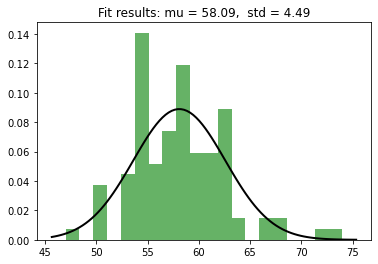

In [37]:
mu, std = norm.fit(l4)
plt.hist(l4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

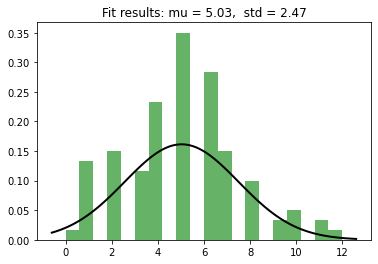

In [38]:
mu, std = norm.fit(d4)
plt.hist(d4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


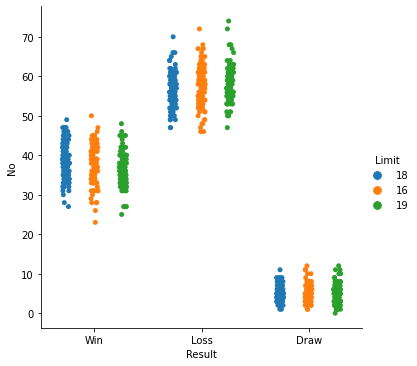

In [39]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w2:
    df=df.append({"No":int(i),"Result":"Win","Limit":"18"},ignore_index=True)
for i in l2:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"18"},ignore_index=True)
for i in d2:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"18"},ignore_index=True)
for i in w3:
    df=df.append({"No":int(i),"Result":"Win","Limit":"16"},ignore_index=True)
for i in l3:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"16"},ignore_index=True)
for i in d3:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"16"},ignore_index=True)
for i in w4:
    df=df.append({"No":int(i),"Result":"Win","Limit":"19"},ignore_index=True)
for i in l4:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"19"},ignore_index=True)
for i in d4:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"19"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Limit",split=True,data=df)

# Model 1

In [40]:
X=[]
Y=[]
for i in range(0,len(b)):
    for j in range(0,len(b[i]["Action"])):
        X.append([b[i]["State"][0],b[i]["State"][1],b[i]["State"][2],b[i]["Action"][j]])
        if b[i]["Reward"][j]==-1:
            Y.append([0,0,1])
        elif b[i]["Reward"][j]==0:
            Y.append([0,1,0])
        elif b[i]["Reward"][j]==1:
            Y.append([1,0,0])

In [41]:
X=np.array(X)
Y=np.array(Y)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
855/855 [==============================] - 9s 8ms/step - loss: 1.6859 - accuracy: 0.4401 - val_loss: 0.1867 - val_accuracy: 0.6076
Epoch 2/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1798 - accuracy: 0.5610 - val_loss: 0.1761 - val_accuracy: 0.6318
Epoch 3/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1780 - accuracy: 0.5674 - val_loss: 0.1763 - val_accuracy: 0.6318
Epoch 4/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1788 - accuracy: 0.5636 - val_loss: 0.1708 - val_accuracy: 0.6365
Epoch 5/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1786 - accuracy: 0.5593 - val_loss: 0.1740 - val_accuracy: 0.6361
Epoch 6/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1783 - accuracy: 0.5658 - val_loss: 0.1692 - val_accuracy: 0.6340
Epoch 7/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1768 - accuracy: 0.5663 - val_loss: 0.1724 - val_accuracy: 0.6021

Epoch 58/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1741 - accuracy: 0.5654 - val_loss: 0.1534 - val_accuracy: 0.6381
Epoch 59/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1738 - accuracy: 0.5651 - val_loss: 0.1542 - val_accuracy: 0.6343
Epoch 60/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1741 - accuracy: 0.5685 - val_loss: 0.1604 - val_accuracy: 0.6188
Epoch 61/100
855/855 [==============================] - 6s 7ms/step - loss: 0.1743 - accuracy: 0.5640 - val_loss: 0.1567 - val_accuracy: 0.6318
Epoch 62/100
855/855 [==============================] - 6s 7ms/step - loss: 0.1733 - accuracy: 0.5708 - val_loss: 0.1554 - val_accuracy: 0.6299
Epoch 63/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1730 - accuracy: 0.5699 - val_loss: 0.1535 - val_accuracy: 0.6375
Epoch 64/100
855/855 [==============================] - 5s 6ms/step - loss: 0.1729 - accuracy: 0.5682 - val_loss: 0.1541 - val_accuracy:

In [43]:
w5=[]
l5=[]
d5=[]
w5.append(0)
d5.append(0)
l5.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w5[len(w5)-1]+=1
    elif reward==0:
        d5[len(d5)-1]+=1
    else:
        l5[len(l5)-1]+=1
    if i%100==0 and i!=0:
        w5.append(0)
        d5.append(0)
        l5.append(0)
print(w5,l5,d5)

[42, 38, 43, 37, 45, 45, 41, 32, 34, 24, 41, 34, 29, 35, 35, 41, 29, 42, 39, 31, 34, 42, 38, 39, 41, 33, 33, 44, 42, 44, 39, 38, 39, 44, 31, 32, 50, 49, 33, 32, 41, 35, 51, 40, 38, 46, 43, 40, 33, 35, 31, 41, 33, 33, 37, 42, 42, 37, 36, 45, 37, 40, 43, 36, 32, 41, 39, 41, 41, 38, 31, 36, 43, 47, 43, 26, 28, 33, 35, 41, 40, 40, 44, 40, 43, 44, 46, 44, 39, 44, 43, 28, 29, 36, 35, 37, 41, 38, 34, 38] [53, 56, 54, 59, 51, 53, 55, 65, 61, 69, 51, 58, 66, 61, 61, 52, 65, 54, 55, 64, 57, 56, 57, 58, 57, 60, 65, 52, 53, 51, 55, 60, 52, 54, 66, 59, 42, 48, 62, 63, 49, 58, 49, 57, 57, 51, 53, 55, 55, 62, 62, 53, 58, 62, 60, 54, 52, 58, 55, 52, 62, 56, 53, 56, 63, 50, 58, 53, 55, 57, 59, 59, 52, 51, 51, 64, 64, 66, 59, 52, 56, 52, 51, 58, 51, 53, 48, 49, 57, 54, 54, 69, 63, 59, 57, 56, 52, 58, 64, 55] [6, 6, 3, 4, 4, 2, 4, 3, 5, 7, 8, 8, 5, 4, 4, 7, 6, 4, 6, 5, 9, 2, 5, 3, 2, 7, 2, 4, 5, 5, 6, 2, 9, 2, 3, 9, 8, 3, 5, 5, 10, 7, 0, 3, 5, 3, 4, 5, 12, 3, 7, 6, 9, 5, 3, 4, 6, 5, 9, 3, 1, 4, 4, 8, 5, 

In [44]:
print( '\n Skewness for data : ', skew(w5))
print( '\n Skewness for data : ', skew(l5))
print( '\n Skewness for data : ', skew(d5))


 Skewness for data :  -0.22048539342277323

 Skewness for data :  0.23580137366823026

 Skewness for data :  0.38222712708908896


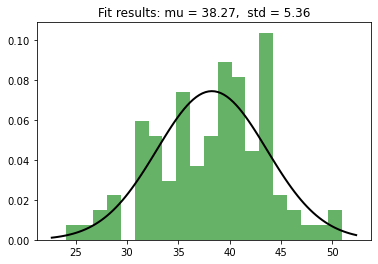

In [45]:
mu, std = norm.fit(w5)
plt.hist(w5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

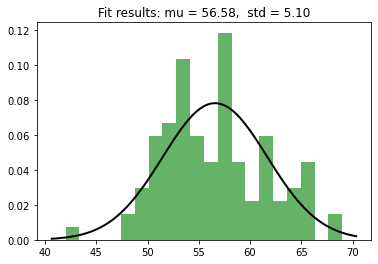

In [46]:
mu, std = norm.fit(l5)
plt.hist(l5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

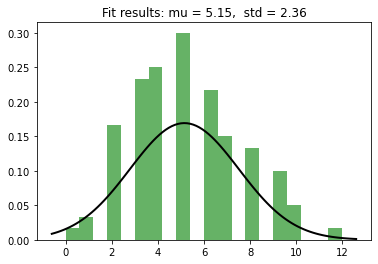

In [47]:
mu, std = norm.fit(d5)
plt.hist(d5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [48]:
w16=[]
l16=[]
d16=[]
w16.append(0)
d16.append(0)
l16.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][2]<=y[0][2]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w16[len(w16)-1]+=1
    elif reward==0:
        d16[len(d16)-1]+=1
    else:
        l16[len(l16)-1]+=1
    if i%100==0 and i!=0:
        w16.append(0)
        d16.append(0)
        l16.append(0)
print(w16,l16,d16)

[17, 16, 18, 14, 14, 10, 12, 17, 13, 10, 16, 13, 19, 15, 15, 16, 15, 12, 10, 16, 16, 15, 8, 13, 16, 16, 16, 20, 11, 15, 15, 17, 18, 10, 16, 13, 18, 17, 10, 14, 14, 21, 12, 12, 13, 17, 13, 7, 10, 12, 9, 12, 14, 17, 11, 19, 17, 12, 13, 13, 8, 11, 16, 20, 10, 17, 14, 19, 17, 5, 6, 20, 19, 11, 9, 14, 16, 15, 14, 12, 17, 14, 13, 15, 9, 24, 14, 10, 18, 14, 8, 17, 12, 13, 14, 15, 16, 14, 14, 9] [78, 80, 77, 84, 82, 86, 85, 79, 80, 83, 82, 85, 79, 80, 83, 81, 83, 80, 87, 78, 83, 82, 92, 86, 79, 83, 79, 79, 84, 79, 82, 78, 79, 88, 79, 82, 81, 79, 86, 78, 84, 77, 84, 86, 80, 80, 85, 85, 86, 85, 87, 83, 82, 81, 86, 75, 76, 82, 86, 82, 86, 82, 83, 77, 83, 75, 80, 75, 83, 88, 90, 76, 77, 83, 89, 83, 79, 80, 85, 86, 79, 83, 87, 83, 88, 74, 80, 86, 76, 82, 87, 78, 83, 85, 81, 81, 79, 81, 81, 88] [6, 4, 5, 2, 4, 4, 3, 4, 7, 7, 2, 2, 2, 5, 2, 3, 2, 8, 3, 6, 1, 3, 0, 1, 5, 1, 5, 1, 5, 6, 3, 5, 3, 2, 5, 5, 1, 4, 4, 8, 2, 2, 4, 2, 7, 3, 2, 8, 4, 3, 4, 5, 4, 2, 3, 6, 7, 6, 1, 5, 6, 7, 1, 3, 7, 8, 6, 6, 0, 

In [49]:
print( '\n Skewness for data : ', skew(w16))
print( '\n Skewness for data : ', skew(l16))
print( '\n Skewness for data : ', skew(d16))


 Skewness for data :  -0.09562417325820165

 Skewness for data :  0.10346154619372942

 Skewness for data :  0.08918145894553846


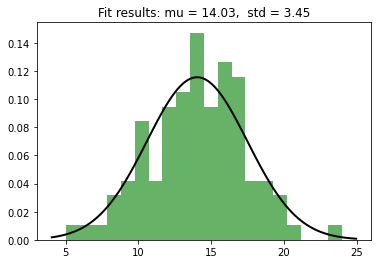

In [50]:
mu, std = norm.fit(w16)
plt.hist(w16, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

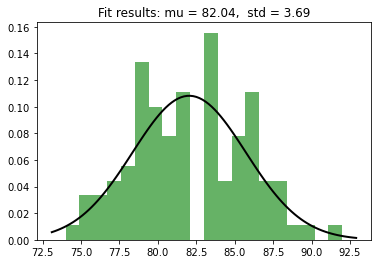

In [51]:
mu, std = norm.fit(l16)
plt.hist(l16, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

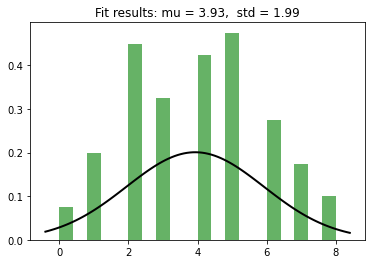

In [52]:
mu, std = norm.fit(d16)
plt.hist(d16, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


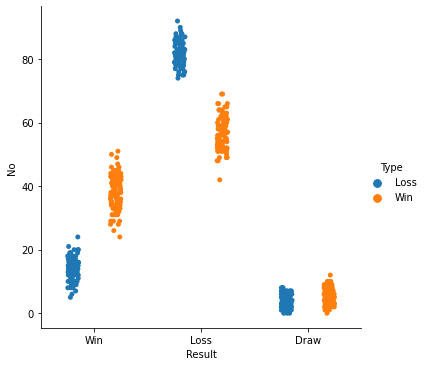

In [53]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w16:
    df=df.append({"No":int(i),"Result":"Win","Type":"Loss"},ignore_index=True)
for i in l16:
    df=df.append({"No":int(i),"Result":"Loss","Type":"Loss"},ignore_index=True)
for i in d16:
    df=df.append({"No":int(i),"Result":"Draw","Type":"Loss"},ignore_index=True)
for i in w5:
    df=df.append({"No":int(i),"Result":"Win","Type":"Win"},ignore_index=True)
for i in l5:
    df=df.append({"No":int(i),"Result":"Loss","Type":"Win"},ignore_index=True)
for i in d5:
    df=df.append({"No":int(i),"Result":"Draw","Type":"Win"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Type",split=True,data=df)

# Model 2

In [54]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


In [55]:
X=[]
Y=[]
for i in range(0,len(b)):
    for j in range(0,len(b[i]["Action"])):
        X.append([b[i]["State"][0],b[i]["State"][1],b[i]["State"][2],b[i]["Action"][j]])
        if b[i]["Reward"][j]==-1:
            Y.append([0,0,1])
        elif b[i]["Reward"][j]==0:
            Y.append([0,1,0])
        elif b[i]["Reward"][j]==1:
            Y.append([1,0,0])
X=np.array(X)
Y=np.array(Y)

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
855/855 [==============================] - 3s 4ms/step - loss: 1.9893 - accuracy: 0.4947 - val_loss: 0.1709 - val_accuracy: 0.6337
Epoch 2/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1806 - accuracy: 0.5561 - val_loss: 0.1682 - val_accuracy: 0.6422
Epoch 3/100
855/855 [==============================] - 4s 4ms/step - loss: 0.1788 - accuracy: 0.5675 - val_loss: 0.1683 - val_accuracy: 0.6327
Epoch 4/100
855/855 [==============================] - 4s 4ms/step - loss: 0.1809 - accuracy: 0.5547 - val_loss: 0.1646 - val_accuracy: 0.6438
Epoch 5/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1802 - accuracy: 0.5578 - val_loss: 0.1639 - val_accuracy: 0.6440
Epoch 6/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1804 - accuracy: 0.5512 - val_loss: 0.1632 - val_accuracy: 0.6386
Epoch 7/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1767 - accuracy: 0.5680 - val_loss: 0.1753 - val_accuracy: 0.6083

Epoch 58/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1721 - accuracy: 0.5781 - val_loss: 0.1505 - val_accuracy: 0.6608
Epoch 59/100
855/855 [==============================] - 3s 3ms/step - loss: 0.1711 - accuracy: 0.5837 - val_loss: 0.1504 - val_accuracy: 0.6639
Epoch 60/100
855/855 [==============================] - 3s 3ms/step - loss: 0.1713 - accuracy: 0.5876 - val_loss: 0.1514 - val_accuracy: 0.6642
Epoch 61/100
855/855 [==============================] - 3s 3ms/step - loss: 0.1712 - accuracy: 0.5840 - val_loss: 0.1513 - val_accuracy: 0.6645
Epoch 62/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1718 - accuracy: 0.5820 - val_loss: 0.1487 - val_accuracy: 0.6636
Epoch 63/100
855/855 [==============================] - 3s 3ms/step - loss: 0.1714 - accuracy: 0.5822 - val_loss: 0.1555 - val_accuracy: 0.6534
Epoch 64/100
855/855 [==============================] - 3s 3ms/step - loss: 0.1718 - accuracy: 0.5773 - val_loss: 0.1503 - val_accuracy:

In [57]:
w6=[]
l6=[]
d6=[]
w6.append(0)
d6.append(0)
l6.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w6[len(w6)-1]+=1
    elif reward==0:
        d6[len(d6)-1]+=1
    else:
        l6[len(l6)-1]+=1
    if i%100==0 and i!=0:
        w6.append(0)
        d6.append(0)
        l6.append(0)
print(w6,l6,d6)

[34, 40, 36, 38, 35, 37, 39, 38, 40, 40, 39, 28, 38, 35, 41, 39, 38, 40, 29, 32, 32, 40, 30, 43, 44, 30, 34, 40, 41, 36, 49, 39, 35, 37, 45, 34, 43, 41, 35, 34, 34, 36, 32, 37, 41, 41, 41, 42, 42, 32, 35, 42, 42, 31, 47, 33, 45, 34, 41, 46, 43, 36, 38, 37, 49, 45, 42, 37, 34, 52, 29, 42, 47, 39, 43, 35, 49, 37, 37, 29, 34, 30, 36, 34, 38, 34, 32, 49, 31, 41, 44, 22, 38, 35, 39, 45, 37, 38, 50, 39] [65, 56, 56, 60, 62, 62, 53, 58, 57, 54, 55, 66, 56, 62, 55, 56, 56, 53, 63, 57, 60, 54, 63, 52, 53, 58, 59, 57, 51, 62, 49, 60, 63, 59, 51, 61, 54, 55, 55, 59, 64, 62, 62, 57, 53, 56, 54, 52, 50, 63, 62, 53, 52, 63, 52, 60, 49, 58, 49, 49, 50, 60, 54, 58, 48, 50, 54, 55, 56, 44, 63, 52, 49, 54, 53, 59, 44, 61, 59, 64, 62, 67, 61, 60, 60, 61, 62, 51, 67, 57, 52, 72, 56, 60, 56, 48, 60, 56, 45, 56] [2, 4, 8, 2, 3, 1, 8, 4, 3, 6, 6, 6, 6, 3, 4, 5, 6, 7, 8, 11, 8, 6, 7, 5, 3, 12, 7, 3, 8, 2, 2, 1, 2, 4, 4, 5, 3, 4, 10, 7, 2, 2, 6, 6, 6, 3, 5, 6, 8, 5, 3, 5, 6, 6, 1, 7, 6, 8, 10, 5, 7, 4, 8, 5, 3

In [58]:
print( '\n Skewness for data : ', skew(w6))
print( '\n Skewness for data : ', skew(l6))
print( '\n Skewness for data : ', skew(d6))


 Skewness for data :  0.09566821382440772

 Skewness for data :  -0.041917316929908785

 Skewness for data :  0.3402935277492796


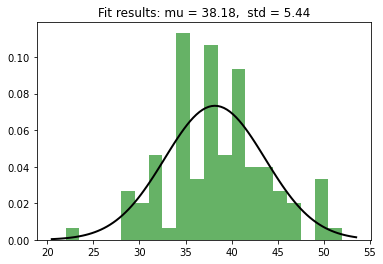

In [59]:
mu, std = norm.fit(w6)
plt.hist(w6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

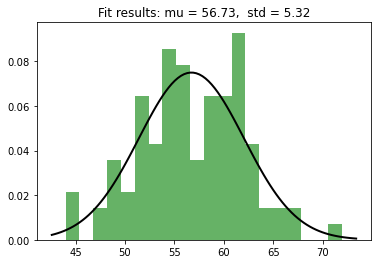

In [60]:
mu, std = norm.fit(l6)
plt.hist(l6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

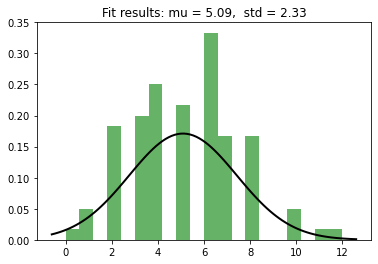

In [61]:
mu, std = norm.fit(d6)
plt.hist(d6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [62]:
w17=[]
l17=[]
d17=[]
w17.append(0)
d17.append(0)
l17.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][2]<=y[0][2]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w17[len(w17)-1]+=1
    elif reward==0:
        d17[len(d17)-1]+=1
    else:
        l17[len(l17)-1]+=1
    if i%100==0 and i!=0:
        w17.append(0)
        d17.append(0)
        l17.append(0)
print(w17,l17,d17)

[18, 16, 18, 12, 13, 13, 12, 14, 14, 14, 16, 9, 11, 14, 15, 19, 17, 10, 17, 19, 16, 11, 13, 15, 11, 12, 9, 8, 11, 12, 17, 11, 14, 12, 15, 9, 12, 12, 15, 16, 21, 12, 11, 7, 13, 11, 8, 15, 15, 13, 14, 11, 14, 12, 12, 9, 10, 16, 21, 15, 9, 15, 16, 16, 11, 17, 17, 18, 18, 10, 16, 7, 13, 11, 16, 18, 12, 15, 17, 13, 16, 15, 13, 13, 16, 21, 7, 14, 15, 12, 12, 19, 10, 18, 15, 14, 16, 19, 10, 13] [80, 76, 78, 86, 81, 84, 86, 82, 80, 83, 81, 88, 85, 85, 84, 77, 81, 88, 80, 76, 78, 86, 82, 82, 83, 83, 85, 87, 84, 85, 80, 87, 84, 85, 80, 86, 85, 86, 78, 80, 77, 84, 85, 92, 86, 87, 89, 83, 82, 81, 84, 88, 81, 88, 83, 85, 87, 79, 73, 82, 88, 81, 81, 80, 87, 79, 81, 77, 77, 85, 82, 87, 84, 83, 81, 77, 84, 82, 80, 80, 79, 80, 82, 86, 81, 76, 89, 78, 82, 85, 85, 77, 87, 79, 83, 81, 80, 78, 89, 83] [3, 8, 4, 2, 6, 3, 2, 4, 6, 3, 3, 3, 4, 1, 1, 4, 2, 2, 3, 5, 6, 3, 5, 3, 6, 5, 6, 5, 5, 3, 3, 2, 2, 3, 5, 5, 3, 2, 7, 4, 2, 4, 4, 1, 1, 2, 3, 2, 3, 6, 2, 1, 5, 0, 5, 6, 3, 5, 6, 3, 3, 4, 3, 4, 2, 4, 2, 5, 5, 

In [63]:
print( '\n Skewness for data : ', skew(w17))
print( '\n Skewness for data : ', skew(l17))
print( '\n Skewness for data : ', skew(d17))


 Skewness for data :  0.05003785919377839

 Skewness for data :  -0.046365903571756815

 Skewness for data :  0.34880616558219196


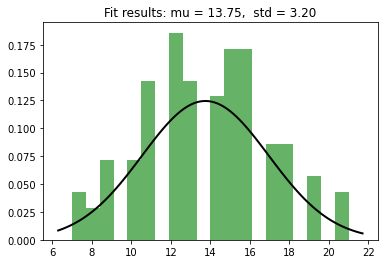

In [64]:
mu, std = norm.fit(w17)
plt.hist(w17, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

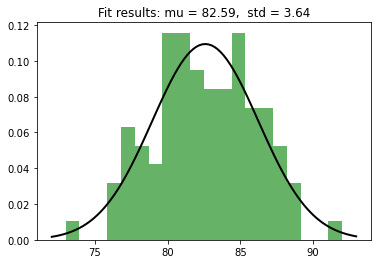

In [65]:
mu, std = norm.fit(l17)
plt.hist(l17, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

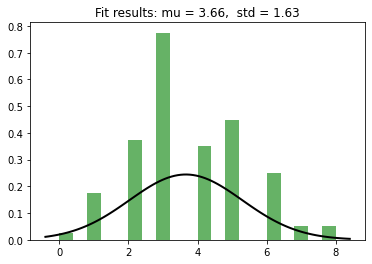

In [66]:
mu, std = norm.fit(d17)
plt.hist(d17, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Model 3

In [67]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.9))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
____________________________________________________

In [68]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
855/855 [==============================] - 4s 4ms/step - loss: 12.2331 - accuracy: 0.3644 - val_loss: 0.2245 - val_accuracy: 0.4491
Epoch 2/100
855/855 [==============================] - 3s 4ms/step - loss: 0.2096 - accuracy: 0.5327 - val_loss: 0.1976 - val_accuracy: 0.4677
Epoch 3/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1953 - accuracy: 0.5424 - val_loss: 0.1965 - val_accuracy: 0.4599
Epoch 4/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1912 - accuracy: 0.5496 - val_loss: 0.1892 - val_accuracy: 0.4601
Epoch 5/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1898 - accuracy: 0.5448 - val_loss: 0.1850 - val_accuracy: 0.4744
Epoch 6/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1880 - accuracy: 0.5445 - val_loss: 0.1868 - val_accuracy: 0.4599
Epoch 7/100
855/855 [==============================] - 4s 5ms/step - loss: 0.1856 - accuracy: 0.5485 - val_loss: 0.1820 - val_accuracy: 0.460

Epoch 58/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1780 - accuracy: 0.5704 - val_loss: 0.1580 - val_accuracy: 0.6500
Epoch 59/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1793 - accuracy: 0.5568 - val_loss: 0.1548 - val_accuracy: 0.6545
Epoch 60/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1782 - accuracy: 0.5671 - val_loss: 0.1601 - val_accuracy: 0.6491
Epoch 61/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1795 - accuracy: 0.5624 - val_loss: 0.1571 - val_accuracy: 0.6551
Epoch 62/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1801 - accuracy: 0.5594 - val_loss: 0.1599 - val_accuracy: 0.6320
Epoch 63/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1800 - accuracy: 0.5558 - val_loss: 0.1550 - val_accuracy: 0.6585
Epoch 64/100
855/855 [==============================] - 3s 4ms/step - loss: 0.1778 - accuracy: 0.5705 - val_loss: 0.1598 - val_accuracy:

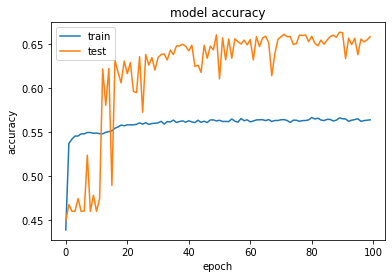

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

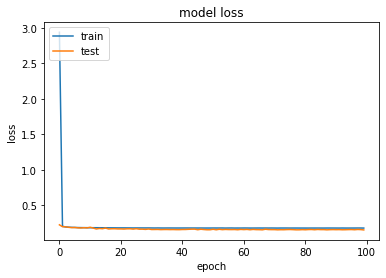

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
w7=[]
l7=[]
d7=[]
w7.append(0)
d7.append(0)
l7.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w7[len(w7)-1]+=1
    elif reward==0:
        d7[len(d7)-1]+=1
    else:
        l7[len(l7)-1]+=1
    if i%100==0 and i!=0:
        w7.append(0)
        d7.append(0)
        l7.append(0)
print(w7,l7,d7)

[42, 41, 34, 32, 37, 39, 34, 30, 42, 33, 41, 51, 41, 29, 45, 42, 41, 39, 39, 34, 36, 39, 37, 39, 39, 35, 33, 44, 34, 43, 41, 35, 32, 35, 41, 31, 38, 32, 39, 34, 33, 43, 36, 42, 32, 40, 41, 41, 43, 47, 35, 37, 37, 44, 33, 46, 39, 41, 33, 40, 46, 44, 37, 41, 39, 42, 34, 35, 46, 38, 35, 46, 39, 37, 36, 44, 35, 30, 38, 37, 48, 40, 34, 34, 41, 35, 24, 37, 40, 46, 35, 41, 43, 36, 37, 37, 33, 36, 38, 32] [54, 53, 61, 63, 57, 56, 61, 65, 53, 58, 56, 46, 53, 69, 51, 53, 51, 51, 54, 61, 59, 57, 60, 54, 54, 61, 60, 48, 59, 50, 56, 60, 62, 62, 53, 64, 59, 58, 57, 61, 59, 50, 56, 51, 63, 57, 54, 53, 56, 50, 59, 56, 55, 53, 60, 47, 57, 50, 64, 56, 48, 51, 60, 52, 54, 54, 62, 56, 49, 57, 57, 51, 56, 58, 59, 50, 62, 66, 57, 57, 43, 58, 62, 58, 55, 59, 70, 59, 58, 48, 60, 56, 52, 56, 59, 59, 61, 58, 57, 60] [5, 6, 5, 5, 6, 5, 5, 5, 5, 9, 3, 3, 6, 2, 4, 5, 8, 10, 7, 5, 5, 4, 3, 7, 7, 4, 7, 8, 7, 7, 3, 5, 6, 3, 6, 5, 3, 10, 4, 5, 8, 7, 8, 7, 5, 3, 5, 6, 1, 3, 6, 7, 8, 3, 7, 7, 4, 9, 3, 4, 6, 5, 3, 7, 7, 

In [72]:
print( '\n Skewness for data : ', skew(w7))
print( '\n Skewness for data : ', skew(l7))
print( '\n Skewness for data : ', skew(d7))


 Skewness for data :  0.0594003656224245

 Skewness for data :  -0.049883743739170386

 Skewness for data :  0.2493448638927385


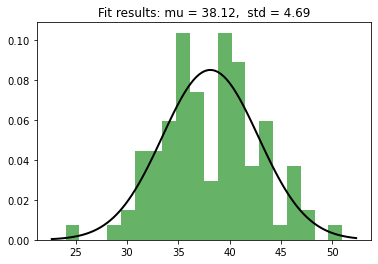

In [73]:
mu, std = norm.fit(w7)
plt.hist(w7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

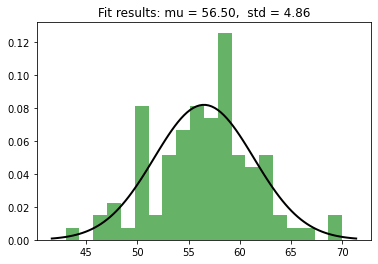

In [74]:
mu, std = norm.fit(l7)
plt.hist(l7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

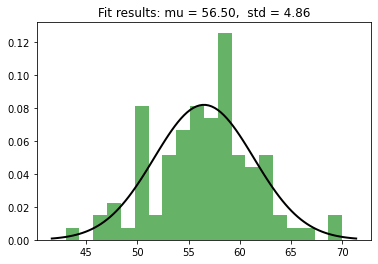

In [75]:
mu, std = norm.fit(l7)
plt.hist(l7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

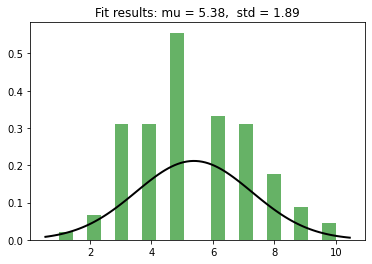

In [76]:
mu, std = norm.fit(d7)
plt.hist(d7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Decission tree

In [110]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5,random_state=0)
clf.fit(X,Y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [111]:
text_representation = sklearn.tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 18.50
|   |   |--- feature_1 <= 8.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_0 <= 17.50
|   |   |   |   |   |--- value: [0.19, 0.05, 0.77]
|   |   |   |   |--- feature_0 >  17.50
|   |   |   |   |   |--- value: [0.38, 0.06, 0.56]
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   |--- value: [0.39, 0.05, 0.56]
|   |   |   |   |--- feature_0 >  16.50
|   |   |   |   |   |--- value: [0.46, 0.17, 0.37]
|   |   |--- feature_1 >  8.50
|   |   |   |--- feature_0 <= 17.50
|   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   |--- value: [0.26, 0.04, 0.70]
|   |   |   |   |--- feature_0 >  16.50
|   |   |   |   |   |--- value: [0.28, 0.11, 0.61]
|   |   |   |--- feature_0 >  17.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- value: [0.40, 0.14, 0.46]
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- value: [0.37, 0.09, 0.54]
|   |--- feature_0 

In [78]:
w8=[]
l8=[]
d8=[]
w8.append(0)
d8.append(0)
l8.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w8[len(w8)-1]+=1
    elif reward==0:
        d8[len(d8)-1]+=1
    else:
        l8[len(l8)-1]+=1
    if i%100==0 and i!=0:
        w8.append(0)
        d8.append(0)
        l8.append(0)
print(w8,l8,d8)

[33, 39, 44, 43, 31, 42, 35, 42, 39, 34, 32, 35, 39, 36, 40, 39, 42, 45, 33, 33, 38, 31, 39, 30, 36, 30, 35, 32, 43, 39, 32, 32, 32, 31, 41, 36, 37, 43, 39, 43, 36, 33, 39, 46, 27, 35, 46, 36, 29, 36, 38, 45, 33, 40, 38, 42, 41, 44, 38, 40, 29, 40, 37, 28, 39, 35, 40, 37, 40, 40, 48, 44, 39, 36, 38, 38, 43, 39, 38, 48, 35, 43, 37, 38, 35, 37, 40, 36, 33, 37, 33, 41, 40, 34, 40, 40, 41, 39, 42, 26] [66, 56, 50, 52, 63, 53, 61, 57, 55, 58, 59, 60, 56, 57, 55, 59, 52, 50, 63, 63, 53, 63, 54, 66, 60, 60, 57, 61, 51, 55, 65, 64, 63, 65, 56, 60, 55, 50, 55, 53, 56, 59, 57, 50, 68, 58, 48, 57, 68, 58, 58, 48, 66, 57, 57, 54, 50, 53, 54, 57, 66, 54, 58, 67, 54, 58, 57, 59, 53, 54, 46, 53, 55, 63, 58, 55, 52, 55, 58, 50, 64, 53, 55, 59, 57, 58, 55, 59, 57, 60, 62, 55, 56, 57, 57, 54, 55, 54, 53, 70] [2, 5, 6, 5, 6, 5, 4, 1, 6, 8, 9, 5, 5, 7, 5, 2, 6, 5, 4, 4, 9, 6, 7, 4, 4, 10, 8, 7, 6, 6, 3, 4, 5, 4, 3, 4, 8, 7, 6, 4, 8, 8, 4, 4, 5, 7, 6, 7, 3, 6, 4, 7, 1, 3, 5, 4, 9, 3, 8, 3, 5, 6, 5, 5, 7, 7

In [79]:
print( '\n Skewness for data : ', skew(w8))
print( '\n Skewness for data : ', skew(l8))
print( '\n Skewness for data : ', skew(d8))


 Skewness for data :  -0.17431712251969192

 Skewness for data :  0.4056304050296091

 Skewness for data :  0.1538224991942206


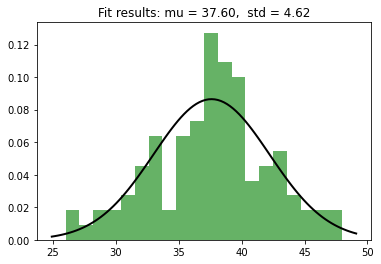

In [80]:
mu, std = norm.fit(w8)
plt.hist(w8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

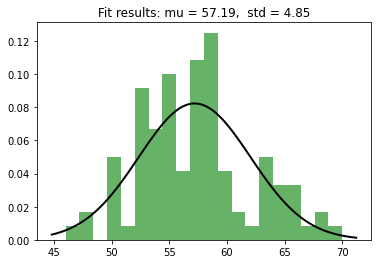

In [81]:
mu, std = norm.fit(l8)
plt.hist(l8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

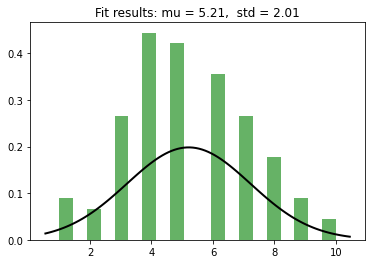

In [82]:
mu, std = norm.fit(d8)
plt.hist(d8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [114]:
clf = DecisionTreeRegressor(max_depth=7,random_state=0)
clf.fit(X,Y)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [115]:
text_representation = sklearn.tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 18.50
|   |   |--- feature_1 <= 8.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_0 <= 17.50
|   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |   |   |--- value: [0.00, 0.00, 1.00]
|   |   |   |   |   |   |--- feature_0 >  5.50
|   |   |   |   |   |   |   |--- value: [0.10, 0.00, 0.90]
|   |   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   |   |   |--- value: [0.20, 0.04, 0.75]
|   |   |   |   |   |   |--- feature_0 >  16.50
|   |   |   |   |   |   |   |--- value: [0.15, 0.15, 0.70]
|   |   |   |   |--- feature_0 >  17.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- value: [0.35, 0.04, 0.62]
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- value: [0.50, 0.17, 0.33]
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   

In [84]:
w9=[]
l9=[]
d9=[]
w9.append(0)
d9.append(0)
l9.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w9[len(w9)-1]+=1
    elif reward==0:
        d9[len(d9)-1]+=1
    else:
        l9[len(l9)-1]+=1
    if i%100==0 and i!=0:
        w9.append(0)
        d9.append(0)
        l9.append(0)
print(w9,l9,d9)

[35, 35, 38, 35, 45, 42, 40, 32, 38, 36, 44, 35, 30, 38, 40, 36, 32, 41, 39, 30, 40, 40, 43, 28, 33, 29, 32, 35, 36, 32, 33, 45, 38, 44, 47, 34, 39, 33, 43, 37, 36, 39, 37, 43, 37, 39, 34, 42, 42, 32, 34, 35, 37, 33, 47, 37, 45, 36, 32, 47, 43, 50, 31, 34, 34, 38, 44, 29, 40, 36, 42, 55, 33, 32, 35, 35, 38, 35, 41, 39, 37, 32, 34, 37, 39, 28, 36, 40, 35, 37, 35, 43, 42, 36, 42, 36, 30, 33, 39, 40] [62, 61, 56, 60, 52, 53, 59, 57, 57, 57, 51, 59, 66, 56, 58, 59, 65, 54, 54, 66, 55, 56, 55, 67, 64, 67, 63, 57, 58, 63, 58, 52, 60, 53, 50, 61, 55, 63, 53, 56, 59, 53, 55, 51, 58, 53, 62, 53, 55, 66, 59, 61, 58, 62, 51, 55, 47, 55, 62, 49, 52, 46, 63, 60, 58, 53, 51, 63, 58, 58, 55, 43, 65, 65, 62, 60, 59, 62, 56, 52, 60, 65, 61, 55, 57, 62, 59, 57, 62, 58, 63, 54, 53, 60, 53, 59, 64, 62, 58, 54] [4, 4, 6, 5, 3, 5, 1, 11, 5, 7, 5, 6, 4, 6, 2, 5, 3, 5, 7, 4, 5, 4, 2, 5, 3, 4, 5, 8, 6, 5, 9, 3, 2, 3, 3, 5, 6, 4, 4, 7, 5, 8, 8, 6, 5, 8, 4, 5, 3, 2, 7, 4, 5, 5, 2, 8, 8, 9, 6, 4, 5, 4, 6, 6, 8, 9

In [85]:
print( '\n Skewness for data : ', skew(w9))
print( '\n Skewness for data : ', skew(l9))
print( '\n Skewness for data : ', skew(d9))


 Skewness for data :  0.6111638966420999

 Skewness for data :  -0.2736978116934135

 Skewness for data :  0.62471462733681


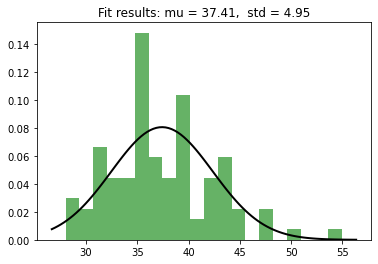

In [86]:
mu, std = norm.fit(w9)
plt.hist(w9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

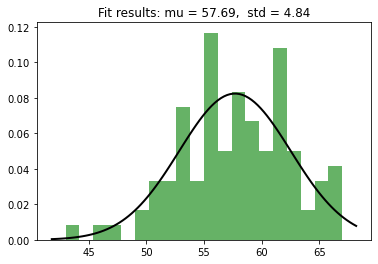

In [87]:
mu, std = norm.fit(l9)
plt.hist(l9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

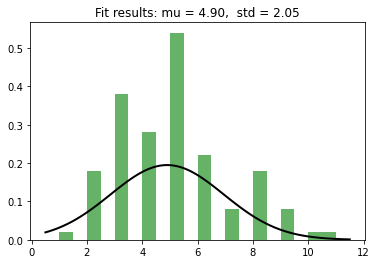

In [88]:
mu, std = norm.fit(d9)
plt.hist(d9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# SVC

In [89]:
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier
svc=OneVsRestClassifier(SVR(C=1.0))
svc.fit(X,Y)

OneVsRestClassifier(estimator=SVR())

In [90]:
w10=[]
l10=[]
d10=[]
w10.append(0)
d10.append(0)
l10.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w10[len(w10)-1]+=1
    elif reward==0:
        d10[len(d10)-1]+=1
    else:
        l10[len(l10)-1]+=1
    if i%100==0 and i!=0:
        w10.append(0)
        d10.append(0)
        l10.append(0)
print(w10,l10,d10)

[38, 32, 31, 40, 34, 42, 29, 37, 38, 41, 38, 33, 33, 44, 25, 39, 33, 45, 35, 40, 37, 32, 39, 40, 43, 40, 40, 40, 41, 40, 42, 42, 40, 55, 34, 47, 47, 41, 40, 27, 40, 48, 33, 34, 39, 37, 56, 41, 42, 41, 35, 40, 38, 37, 39, 34, 30, 40, 36, 47, 41, 36, 42, 39, 38, 30, 44, 48, 42, 43, 40, 34, 38, 42, 39, 43, 30, 36, 38, 40, 31, 36, 37, 45, 37, 35, 37, 33, 42, 28, 39, 39, 45, 46, 49, 37, 39, 36, 41, 41] [61, 65, 62, 56, 63, 49, 68, 57, 55, 53, 60, 62, 63, 49, 71, 60, 59, 48, 57, 56, 58, 65, 56, 57, 55, 54, 55, 56, 57, 53, 52, 47, 56, 42, 60, 51, 48, 50, 57, 70, 57, 46, 63, 59, 52, 59, 41, 55, 52, 55, 61, 50, 58, 58, 54, 53, 67, 55, 61, 50, 56, 62, 56, 57, 59, 64, 50, 45, 53, 52, 49, 66, 54, 56, 56, 55, 66, 59, 56, 54, 63, 58, 57, 52, 59, 62, 56, 57, 56, 68, 60, 56, 52, 52, 48, 59, 58, 61, 53, 57] [2, 3, 7, 4, 3, 9, 3, 6, 7, 6, 2, 5, 4, 7, 4, 1, 8, 7, 8, 4, 5, 3, 5, 3, 2, 6, 5, 4, 2, 7, 6, 11, 4, 3, 6, 2, 5, 9, 3, 3, 3, 6, 4, 7, 9, 4, 3, 4, 6, 4, 4, 10, 4, 5, 7, 13, 3, 5, 3, 3, 3, 2, 2, 4, 3,

In [91]:
print( '\n Skewness for data : ', skew(w10))
print( '\n Skewness for data : ', skew(l10))
print( '\n Skewness for data : ', skew(d10))


 Skewness for data :  0.2574468536215461

 Skewness for data :  0.004008454891208163

 Skewness for data :  0.8551425004057667


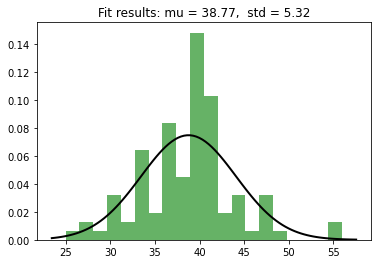

In [92]:
mu, std = norm.fit(w10)
plt.hist(w10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

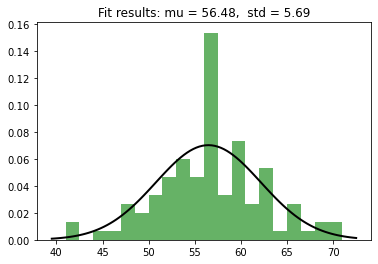

In [93]:
mu, std = norm.fit(l10)
plt.hist(l10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

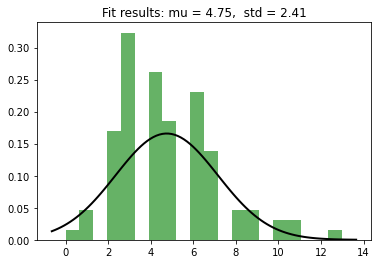

In [94]:
mu, std = norm.fit(d10)
plt.hist(d10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X, Y)

OneVsRestClassifier(estimator=GaussianNB())

In [96]:
w11=[]
l11=[]
d11=[]
w11.append(0)
d11.append(0)
l11.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w11[len(w11)-1]+=1
    elif reward==0:
        d11[len(d11)-1]+=1
    else:
        l11[len(l11)-1]+=1
    if i%100==0 and i!=0:
        w11.append(0)
        d11.append(0)
        l11.append(0)
print(w11,l11,d11)

[41, 34, 32, 40, 32, 36, 41, 39, 30, 43, 47, 45, 37, 37, 38, 36, 37, 41, 38, 34, 35, 33, 48, 37, 33, 36, 42, 38, 37, 30, 40, 44, 48, 35, 38, 40, 29, 44, 35, 35, 46, 41, 41, 41, 43, 37, 41, 38, 39, 45, 33, 31, 34, 41, 32, 34, 41, 41, 43, 28, 33, 31, 39, 33, 34, 41, 39, 41, 35, 35, 36, 47, 39, 41, 40, 41, 48, 42, 37, 36, 32, 36, 33, 42, 32, 32, 33, 29, 40, 36, 35, 46, 35, 22, 33, 35, 35, 35, 38, 36] [53, 63, 59, 58, 63, 60, 55, 52, 66, 50, 50, 52, 56, 61, 52, 57, 60, 56, 59, 55, 63, 63, 49, 58, 60, 61, 52, 59, 57, 64, 57, 49, 46, 58, 54, 57, 65, 49, 57, 59, 49, 52, 54, 50, 55, 59, 55, 56, 55, 49, 60, 63, 59, 54, 63, 63, 54, 53, 52, 68, 61, 63, 53, 66, 63, 56, 55, 51, 65, 63, 61, 50, 55, 52, 57, 52, 45, 55, 63, 58, 66, 58, 62, 53, 63, 61, 59, 65, 55, 57, 62, 48, 60, 73, 62, 59, 60, 60, 59, 58] [7, 3, 9, 2, 5, 4, 4, 9, 4, 7, 3, 3, 7, 2, 10, 7, 3, 3, 3, 11, 2, 4, 3, 5, 7, 3, 6, 3, 6, 6, 3, 7, 6, 7, 8, 3, 6, 7, 8, 6, 5, 7, 5, 9, 2, 4, 4, 6, 6, 6, 7, 6, 7, 5, 5, 3, 5, 6, 5, 4, 6, 6, 8, 1, 3, 

In [97]:
print( '\n Skewness for data : ', skew(w11))
print( '\n Skewness for data : ', skew(l11))
print( '\n Skewness for data : ', skew(d11))


 Skewness for data :  0.006576548826154152

 Skewness for data :  0.01723633374990859

 Skewness for data :  0.028255570215785803


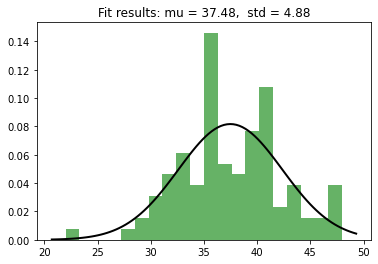

In [98]:
mu, std = norm.fit(w11)
plt.hist(w11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

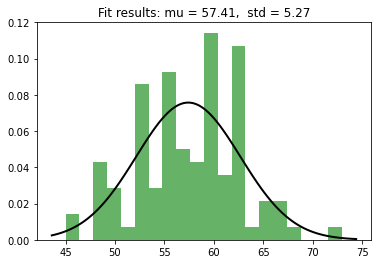

In [99]:
mu, std = norm.fit(l11)
plt.hist(l11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

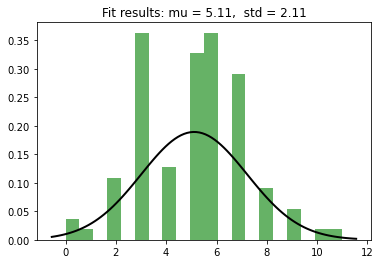

In [100]:
mu, std = norm.fit(d11)
plt.hist(d11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [101]:
w12=[]
l12=[]
d12=[]
w12.append(0)
d12.append(0)
l12.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        c=[[state_1[0],state_1[1],state_1[2],1]]
        e=[[state_1[0],state_1[1],state_1[2],0]]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if (x[0][0]-0.5*x[0][2])>=(y[0][0]-0.5*y[0][2]):
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w12[len(w12)-1]+=1
    elif reward==0:
        d12[len(d12)-1]+=1
    else:
        l12[len(l12)-1]+=1
    if i%100==0 and i!=0:
        w12.append(0)
        d12.append(0)
        l12.append(0)
print(w12,l12,d12)

[32, 38, 29, 44, 32, 39, 41, 39, 35, 31, 41, 46, 35, 33, 45, 52, 40, 36, 38, 38, 33, 37, 35, 33, 40, 37, 38, 36, 32, 36, 36, 37, 36, 41, 41, 40, 25, 35, 41, 43, 36, 37, 41, 36, 33, 29, 42, 39, 46, 34, 37, 38, 34, 39, 42, 48, 31, 32, 37, 34, 35, 41, 34, 37, 38, 36, 39, 37, 37, 42, 36, 34, 41, 44, 46, 33, 34, 41, 34, 32, 38, 36, 47, 35, 48, 36, 45, 46, 46, 40, 38, 44, 42, 40, 34, 38, 40, 39, 38, 43] [67, 54, 67, 52, 62, 57, 54, 59, 60, 63, 50, 50, 58, 63, 53, 44, 57, 57, 59, 59, 60, 56, 61, 61, 52, 57, 56, 59, 63, 64, 59, 59, 59, 57, 56, 58, 69, 59, 57, 51, 61, 54, 52, 59, 65, 67, 57, 59, 53, 61, 60, 55, 63, 55, 53, 52, 65, 63, 59, 58, 63, 55, 59, 57, 58, 61, 52, 61, 57, 52, 59, 60, 55, 50, 47, 63, 61, 49, 62, 66, 60, 60, 44, 58, 49, 59, 50, 51, 50, 56, 58, 53, 55, 57, 61, 57, 57, 56, 58, 52] [2, 8, 4, 4, 6, 4, 5, 2, 5, 6, 9, 4, 7, 4, 2, 4, 3, 7, 3, 3, 7, 7, 4, 6, 8, 6, 6, 5, 5, 0, 5, 4, 5, 2, 3, 2, 6, 6, 2, 6, 3, 9, 7, 5, 2, 4, 1, 2, 1, 5, 3, 7, 3, 6, 5, 0, 4, 5, 4, 8, 2, 4, 7, 6, 4, 3,

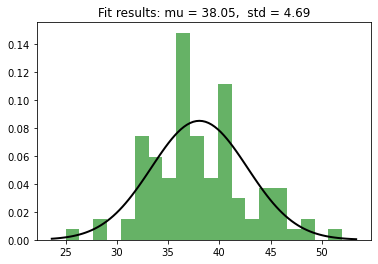

In [102]:
mu, std = norm.fit(w12)
plt.hist(w12, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

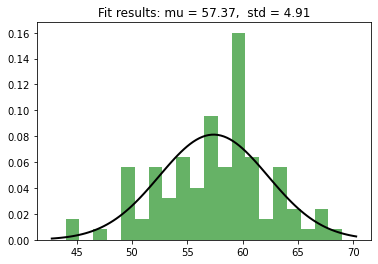

In [103]:
mu, std = norm.fit(l12)
plt.hist(l12, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

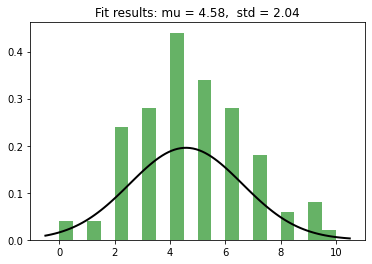

In [104]:
mu, std = norm.fit(d12)
plt.hist(d12, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [105]:
scipy.stats.ttest_1samp(w2,popmean=38.57)

Ttest_1sampResult(statistic=-0.7823946393742883, pvalue=0.4358500855831051)

## Random

In [106]:
w20=[]
l20=[]
d20=[]
w20.append(0)
d20.append(0)
l20.append(0)
for i in range(0,10000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        a=env.action_space.sample()
        state,reward,is_done,info=env.step(a)
    if reward==1:
        w20[len(w20)-1]+=1
    elif reward==0:
        d20[len(d20)-1]+=1
    else:
        l20[len(l20)-1]+=1
    if i%100==0 and i!=0:
        w20.append(0)
        d20.append(0)
        l20.append(0)
print(w20,l20,d20)

[28, 27, 24, 33, 27, 24, 22, 31, 24, 32, 33, 31, 29, 27, 31, 34, 27, 20, 31, 23, 31, 25, 31, 21, 32, 35, 31, 30, 25, 25, 23, 34, 31, 20, 36, 26, 27, 30, 25, 34, 31, 25, 19, 27, 24, 24, 23, 28, 33, 22, 21, 29, 31, 30, 33, 30, 29, 29, 24, 26, 28, 35, 28, 29, 37, 28, 22, 25, 39, 20, 29, 23, 30, 31, 25, 25, 30, 32, 33, 38, 29, 32, 27, 25, 37, 25, 32, 21, 35, 26, 26, 29, 26, 30, 24, 29, 27, 18, 30, 19] [72, 70, 71, 67, 70, 68, 75, 67, 71, 64, 64, 67, 65, 73, 64, 65, 69, 77, 63, 71, 67, 66, 65, 75, 65, 63, 68, 65, 71, 70, 76, 64, 61, 74, 55, 69, 71, 65, 68, 60, 67, 68, 72, 71, 70, 68, 74, 67, 63, 74, 72, 68, 63, 67, 63, 69, 68, 66, 74, 72, 69, 60, 69, 67, 61, 71, 75, 67, 57, 75, 68, 72, 68, 66, 71, 69, 68, 62, 64, 56, 66, 65, 69, 72, 56, 69, 66, 76, 63, 69, 69, 68, 69, 65, 73, 65, 67, 74, 69, 77] [1, 3, 5, 0, 3, 8, 3, 2, 5, 4, 3, 2, 6, 0, 5, 1, 4, 3, 6, 6, 2, 9, 4, 4, 3, 2, 1, 5, 4, 5, 1, 2, 8, 6, 9, 5, 2, 5, 7, 6, 2, 7, 9, 2, 6, 8, 3, 5, 4, 4, 7, 3, 6, 3, 4, 1, 3, 5, 2, 2, 3, 5, 3, 4, 2, 1,

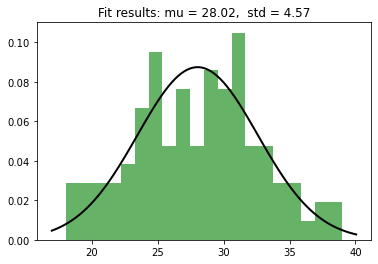

In [107]:
mu, std = norm.fit(w20)
plt.hist(w20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

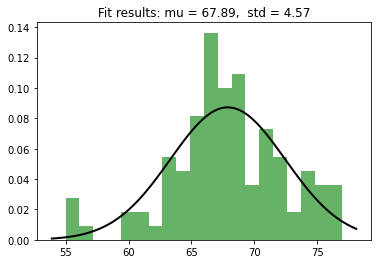

In [108]:
mu, std = norm.fit(l20)
plt.hist(l20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

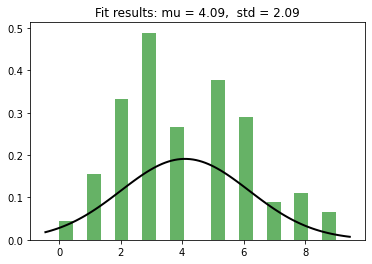

In [109]:
mu, std = norm.fit(d20)
plt.hist(d20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()